# A model for each income 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

## A dataframe for each income

* fisher_pd
* farmer_pd
* retired_pd
* craftsman_pd
* civil_pd
* homemaker_pd
* child_pd

In [10]:
all_profession = pd.read_csv('population_matka_bots_year110.csv')
all_profession.head()
all_profession['profession'].unique()

array(['civil servant', 'child', 'unemployed', 'farmer', 'homemaker',
       'fisher', 'craftsman', 'service provider', 'retired'], dtype=object)

AVERAGE INCOME - ALL PROFESSIONS (LAST 5 YEARS)
Excluding: child, unemployed, homemaker

📊 OVERALL STATISTICS (Years 106-110):
   Average Income: 3369.11
   Total Records: 1373
   Median Income: 2838.51
   Std Deviation: 2167.77

📊 AVERAGE INCOME BY PROFESSION (Years 106-110):
                  avg_income  count
profession                         
civil servant        5510.53    131
service provider     5461.60    166
craftsman            4462.78    173
retired              3343.37    318
fisher               2453.19    277
farmer               1566.57    308

📊 AVERAGE INCOME BY YEAR:
      avg_income  count
year                   
106      3458.82    272
107      3142.26    275
108      3691.90    276
109      3261.53    276
110      3290.98    274


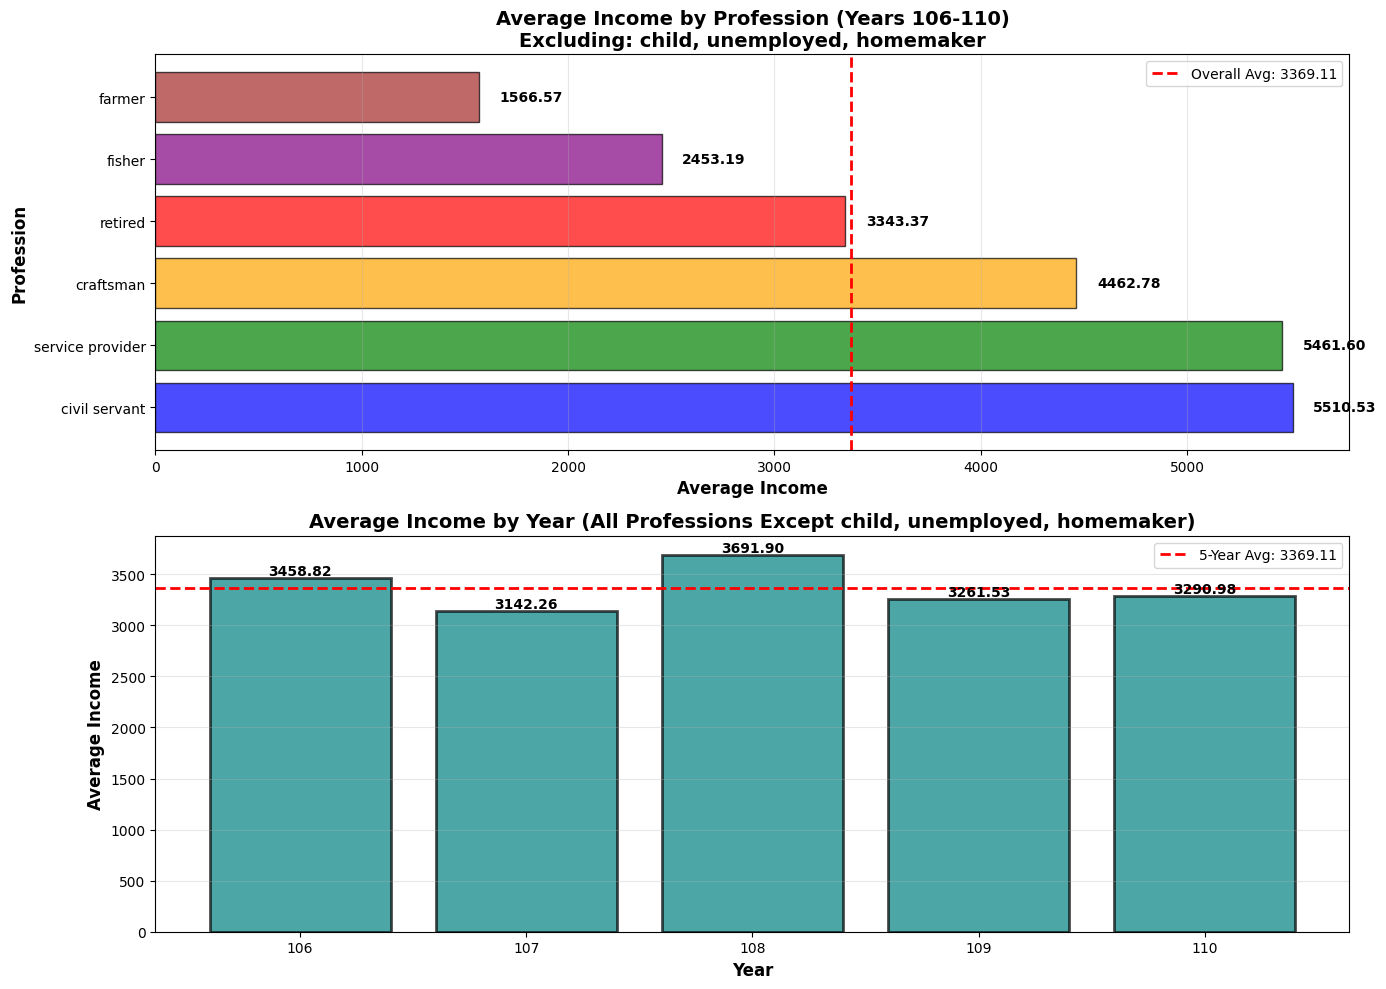


📈 YEAR-OVER-YEAR CHANGES:
   Year 106 → 107: -316.56 (-9.15%)
   Year 107 → 108: +549.64 (+17.49%)
   Year 108 → 109: -430.37 (-11.66%)
   Year 109 → 110: +29.45 (+0.90%)


In [11]:
#average income of all profession for the past 5 year except child unemployed and homemaker

# Average income of all professions for the past 5 years except child, unemployed and homemaker

print("="*70)
print("AVERAGE INCOME - ALL PROFESSIONS (LAST 5 YEARS)")
print("Excluding: child, unemployed, homemaker")
print("="*70)

# Filter out child, unemployed, and homemaker
professions_to_exclude = ['child', 'unemployed', 'homemaker']
filtered_profession = all_profession[~all_profession['profession'].isin(professions_to_exclude)]

# Filter for last 5 years (years 106-110)
last_5_years_all = filtered_profession[filtered_profession['year'] >= 106]

# Calculate overall average income
overall_avg_income = last_5_years_all['income'].mean()

# Calculate by profession
avg_by_profession = last_5_years_all.groupby('profession')['income'].agg(['mean', 'count']).round(2)
avg_by_profession.columns = ['avg_income', 'count']
avg_by_profession = avg_by_profession.sort_values('avg_income', ascending=False)

# Calculate by year
avg_by_year = last_5_years_all.groupby('year')['income'].agg(['mean', 'count']).round(2)
avg_by_year.columns = ['avg_income', 'count']

print(f"\n📊 OVERALL STATISTICS (Years 106-110):")
print(f"   Average Income: {overall_avg_income:.2f}")
print(f"   Total Records: {len(last_5_years_all)}")
print(f"   Median Income: {last_5_years_all['income'].median():.2f}")
print(f"   Std Deviation: {last_5_years_all['income'].std():.2f}")

print(f"\n📊 AVERAGE INCOME BY PROFESSION (Years 106-110):")
print(avg_by_profession.to_string())

print(f"\n📊 AVERAGE INCOME BY YEAR:")
print(avg_by_year.to_string())

# Visualize
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Plot 1: Average income by profession
ax1 = axes[0]
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']
bars = ax1.barh(avg_by_profession.index, avg_by_profession['avg_income'], 
                color=colors[:len(avg_by_profession)], alpha=0.7, edgecolor='black')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, avg_by_profession['avg_income'])):
    ax1.text(value + 100, bar.get_y() + bar.get_height()/2, 
            f'{value:.2f}',
            ha='left', va='center', fontweight='bold', fontsize=10)

ax1.axvline(x=overall_avg_income, color='red', linestyle='--', linewidth=2,
            label=f'Overall Avg: {overall_avg_income:.2f}')
ax1.set_xlabel('Average Income', fontsize=12, fontweight='bold')
ax1.set_ylabel('Profession', fontsize=12, fontweight='bold')
ax1.set_title('Average Income by Profession (Years 106-110)\nExcluding: child, unemployed, homemaker', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='x')

# Plot 2: Average income by year
ax2 = axes[1]
bars2 = ax2.bar(avg_by_year.index, avg_by_year['avg_income'], 
                color='teal', alpha=0.7, edgecolor='black', linewidth=2)
ax2.axhline(y=overall_avg_income, color='red', linestyle='--', linewidth=2,
            label=f'5-Year Avg: {overall_avg_income:.2f}')

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Income', fontsize=12, fontweight='bold')
ax2.set_title('Average Income by Year (All Professions Except child, unemployed, homemaker)', 
              fontsize=14, fontweight='bold')
ax2.set_xticks(avg_by_year.index)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Additional insights
print(f"\n📈 YEAR-OVER-YEAR CHANGES:")
for i in range(1, len(avg_by_year)):
    year = avg_by_year.index[i]
    prev_year = avg_by_year.index[i-1]
    change = avg_by_year.loc[year, 'avg_income'] - avg_by_year.loc[prev_year, 'avg_income']
    pct_change = (change / avg_by_year.loc[prev_year, 'avg_income']) * 100
    print(f"   Year {int(prev_year)} → {int(year)}: {change:+.2f} ({pct_change:+.2f}%)")

## Fishers 

* decrease one per year


Estimate equation of patterns: 
def fisher_income_model(year):
    """
    Model for fisher average income based on observed patterns
    """
    # Parameters
    baseline = 3300
    amplitude = 425
    period = 59
    good_year_spike = 975
    bad_year_spike = -825
    
    # Long-term sine wave component
    long_wave = baseline + amplitude * -(np.cos(2 * np.pi * year / period))
    
    if year < 100:
        # Normal 3-year fishing cycle (good year starting at year 5, then 8, 11, etc.)
        if year >= 4 and (year - 4) % 3 == 0:
            spike = good_year_spike
        elif year >= 4:
            spike = bad_year_spike
        else:
            spike = 0
    elif year == 100:
        spike = good_year_spike  # Year 100 is good (anomaly)
    elif year == 101:
        spike = bad_year_spike   # Year 101 is bad
    elif year == 102:
        spike = good_year_spike  # Year 102 is good
    else:
        # After year 102, cycle shifts: 103 bad, 104 bad, 105 good, 106 bad, 107 bad, 108 good...
        # Good years are now 105, 108, 111, ... which is (year - 105) % 3 == 0
        if (year - 105) % 3 == 0:
            spike = good_year_spike
        else:
            spike = bad_year_spike
    
    return long_wave + spike

In [82]:
fisher_pd = all_profession[all_profession['profession'] == 'fisher']
fisher_pd = fisher_pd.reset_index(drop=False)
fisher_pd.head()

index  year sex profession   income  net_worth  happiness
0      9     0   M     fisher  1381.20    10000.0      100.0
1     11     0   F     fisher  1289.44    10000.0      100.0
2     34     0   M     fisher  2372.70    10000.0      100.0
3     58     0   M     fisher  2603.16    10000.0      100.0
4     63     0   F     fisher  1288.57    10000.0      100.0

In [83]:
fisher_year_income = np.round(fisher_pd.groupby('year')['income'].mean().reset_index(), 2)
fisher_year_income = fisher_year_income.rename(columns={'income': 'avg_income'})
# a collumn with the sum of all income
fisher_year_income['sum_income'] = np.round(fisher_pd.groupby('year')['income'].sum().values, 2)
fisher_year_income['num_fishers'] = np.round(fisher_pd.groupby('year')['income'].count().values, 2)
fisher_year_income['avg_income_per_fisher'] = np.round(fisher_year_income['sum_income'] / fisher_year_income['num_fishers'], 2)
fisher_year_income['avg_net_worth'] = np.round(fisher_pd.groupby('year')['net_worth'].mean().values, 2)
fisher_year_income['sum_net_worth'] = np.round(fisher_pd.groupby('year')['net_worth'].sum().values, 2)
fisher_year_income['avg_net_worth_per_fisher'] = np.round(fisher_year_income['sum_net_worth'] / fisher_year_income['num_fishers'], 2)

#reorder the collumns 
order_columns = ['year', 'num_fishers', 'avg_income', 'sum_income', 'avg_income_per_fisher', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_fisher']
fisher_year_income = fisher_year_income[order_columns]

fisher_year_income.head(15)


year  num_fishers  avg_income  sum_income  avg_income_per_fisher  \
0      0           53     2232.42   118318.22                2232.42   
1      1           50     2218.97   110948.32                2218.97   
2      2           48     2227.71   106930.26                2227.71   
3      3           47     2184.15   102654.87                2184.15   
4      4           45     3760.24   169210.61                3760.24   
5      5           46     2026.52    93219.87                2026.52   
6      6           45     2142.36    96406.24                2142.36   
7      7           45     3760.81   169236.27                3760.81   
8      8           46     2059.17    94721.90                2059.17   
9      9           47     2290.02   107630.93                2290.02   
10    10           48     4284.79   205669.70                4284.79   
11    11           48     2346.82   112647.24                2346.82   
12    12           49     2321.09   113733.57                2321.09   
13    13           51     4259.90   217254.80                4259.90   
14    14           53     2407.16   127579.30                2407.16   

    avg_net_worth  sum_net_worth  avg_net_worth_per_fisher  
0        10000.00      530000.00                  10000.00  
1        10835.56      541778.04                  10835.56  
2        11651.59      559276.47                  11651.59  
3        12365.75      581190.02                  12365.75  
4        13899.41      625473.55                  13899.41  
5        14572.00      670311.86                  14572.00  
6        15302.35      688605.63                  15302.35  
7        16529.88      743844.38                  16529.88  
8        17176.23      790106.42                  17176.23  
9        17592.46      826845.68                  17592.46  
10       19289.08      925875.71                  19289.08  
11       19807.75      950771.81                  19807.75  
12       19919.05      976033.28                  19919.05  
13       21322.61     1087453.26                  21322.61  
14       21169.41     1121978.72                  21169.41

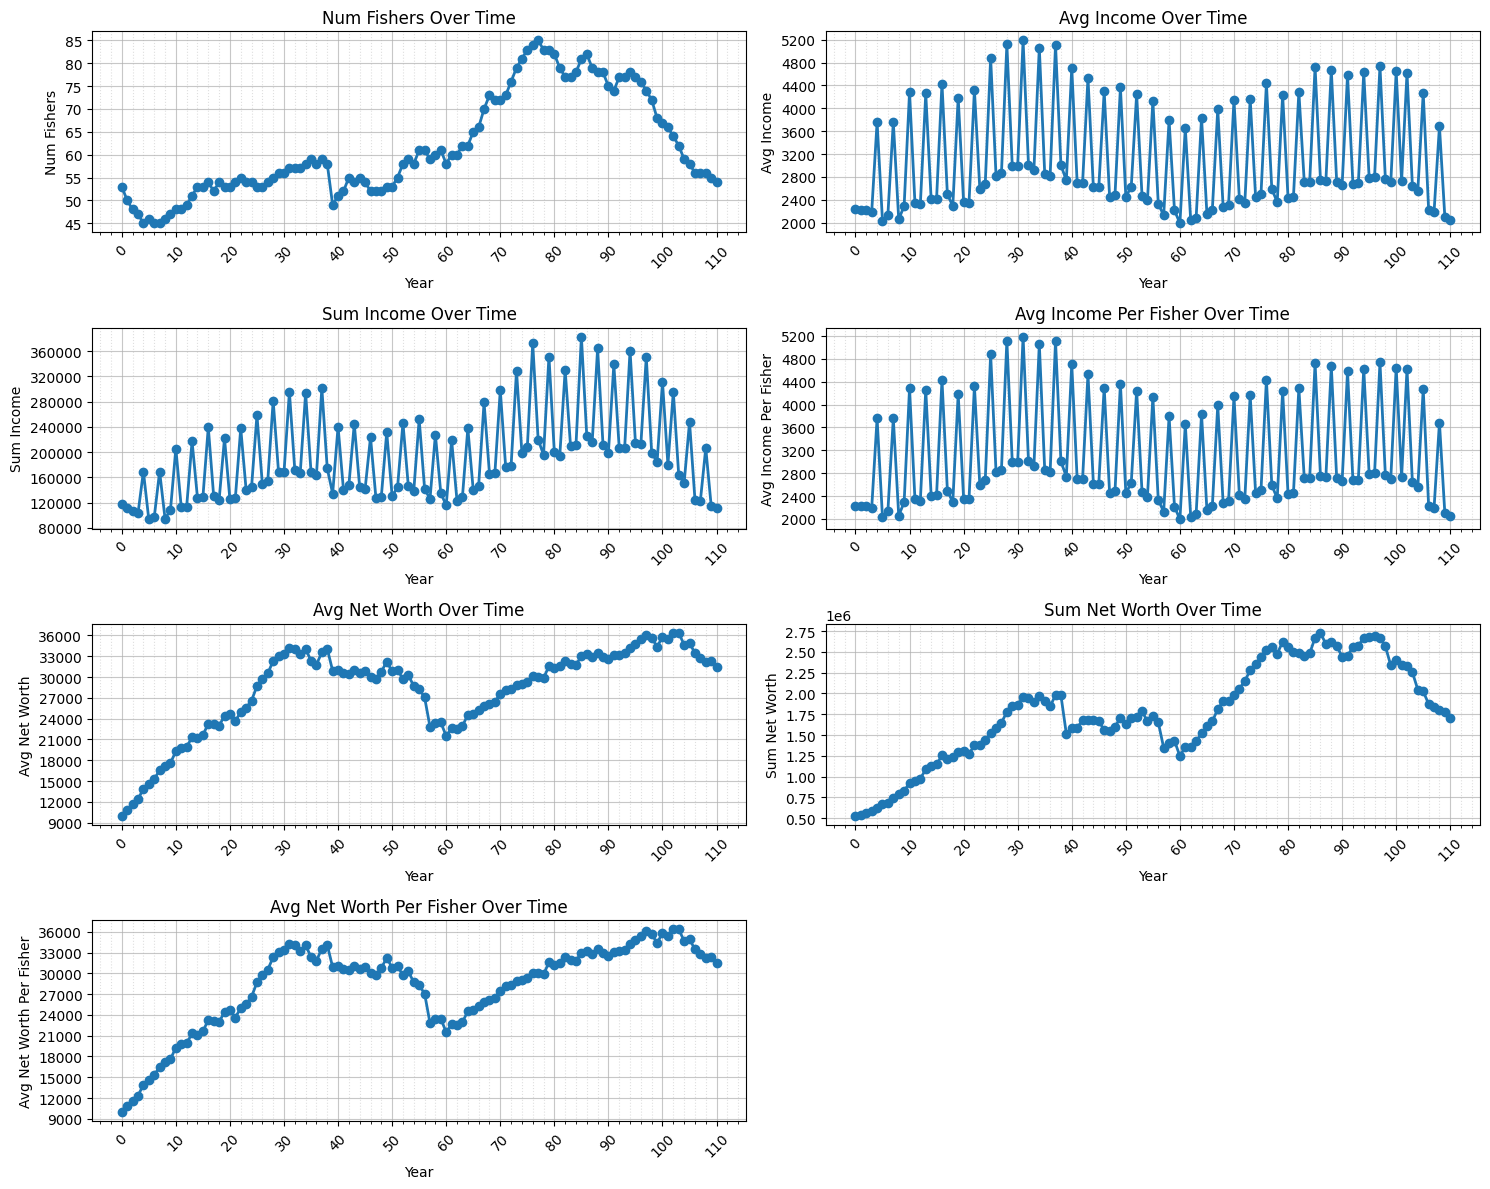

In [84]:
#graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in fisher_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(fisher_year_income['year'], fisher_year_income[var], marker='o', linewidth=2)
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Possible pattern

avg_income = baseline + amplitude * sin(2π * year / period) + spike_pattern

### Fisher Income Model

**Observed Patterns:**
1. **3-year fishing cycle**: 1 good year (year 5, 8, 11...) followed by 2 bad years
2. **Long-term sine wave**: ~55-year period with peaks around years 25-30 and 80-85
3. **Baseline**: ~3200 (central tendency)
4. **Amplitude**: ~800-1000 for the sine wave
5. **Spike amplitude**: +600 for good fishing years, -300 for bad years

**Proposed Equation:**
```
avg_income = baseline + amplitude * sin(2π * year / period) + fishing_cycle_spike
```
baseline=3200, amplitude=300, period=57, good_spike=925, bad_spike=-750

Best Parameters:
  Baseline: 3300
  Amplitude: 425
  Period: 59
  Good Year Spike: 975
  Bad Year Spike: -825

In [85]:
# Model Fisher Average Income
def fisher_income_model(year):
    """
    Model for fisher average income based on observed patterns
    """
    # Parameters
    baseline = 3300
    amplitude = 425
    period = 59
    good_year_spike = 975
    bad_year_spike = -825
    
    # Long-term sine wave component
    long_wave = baseline + amplitude * -(np.cos(2 * np.pi * year / period))
    
    if year < 100:
        # Normal 3-year fishing cycle (good year starting at year 5, then 8, 11, etc.)
        if year >= 4 and (year - 4) % 3 == 0:
            spike = good_year_spike
        elif year >= 4:
            spike = bad_year_spike
        else:
            spike = 0
    elif year == 100:
        spike = good_year_spike  # Year 100 is good (anomaly)
    elif year == 101:
        spike = bad_year_spike   # Year 101 is bad
    elif year == 102:
        spike = good_year_spike  # Year 102 is good
    else:
        # After year 102, cycle shifts: 103 bad, 104 bad, 105 good, 106 bad, 107 bad, 108 good...
        # Good years are now 105, 108, 111, ... which is (year - 105) % 3 == 0
        if (year - 105) % 3 == 0:
            spike = good_year_spike
        else:
            spike = bad_year_spike
    
    return long_wave + spike

# Generate model predictions for all years
fisher_year_income['model_avg_income'] = fisher_year_income['year'].apply(fisher_income_model)

# Calculate error metrics
fisher_year_income['error'] = fisher_year_income['avg_income'] - fisher_year_income['model_avg_income']
fisher_year_income['abs_error'] = np.abs(fisher_year_income['error'])
fisher_year_income['pct_error'] = np.round(100 * fisher_year_income['error'] / fisher_year_income['avg_income'], 2)

# Display statistics
print(f"Mean Absolute Error: {fisher_year_income['abs_error'].mean():.2f}")
print(f"Mean Percentage Error: {fisher_year_income['pct_error'].mean():.2f}%")
print(f"Max Error: {fisher_year_income['abs_error'].max():.2f}")

fisher_year_income[['year', 'avg_income', 'model_avg_income', 'error', 'pct_error']].head(20)

Mean Absolute Error: 171.06
Mean Percentage Error: -1.09%
Max Error: 712.36


year  avg_income  model_avg_income       error  pct_error
0      0     2232.42       2875.000000 -642.580000     -28.78
1      1     2218.97       2877.407710 -658.437710     -29.67
2      2     2227.71       2884.603559 -656.893559     -29.49
3      3     2184.15       2896.506016 -712.356016     -32.61
4      4     3760.24       3887.980222 -127.740222      -3.40
5      5     2026.52       2108.839515  -82.319515      -4.06
6      6     2142.36       2133.847554    8.512446       0.40
7      7     3760.81       3962.720986 -201.910986      -5.37
8      8     2059.17       2195.132664 -135.962664      -6.60
9      9     2290.02       2230.715351   59.304649       2.59
10    10     4284.79       4069.065880  215.724120       5.03
11    11     2346.82       2309.749725   37.070275       1.58
12    12     2321.09       2352.305922  -31.215922      -1.34
13    13     4259.90       4196.252292   63.647708       1.49
14    14     2407.16       2441.090905  -33.930905      -1.41
15    15     2418.33       2486.313722  -67.983722      -2.81
16    16     4433.68       4331.408349  102.271651       2.31
17    17     2495.92       2575.863847  -79.943847      -3.20
18    18     2291.42       2619.176518 -327.756518     -14.30
19    19     4188.48       4460.855611 -272.375611      -6.50

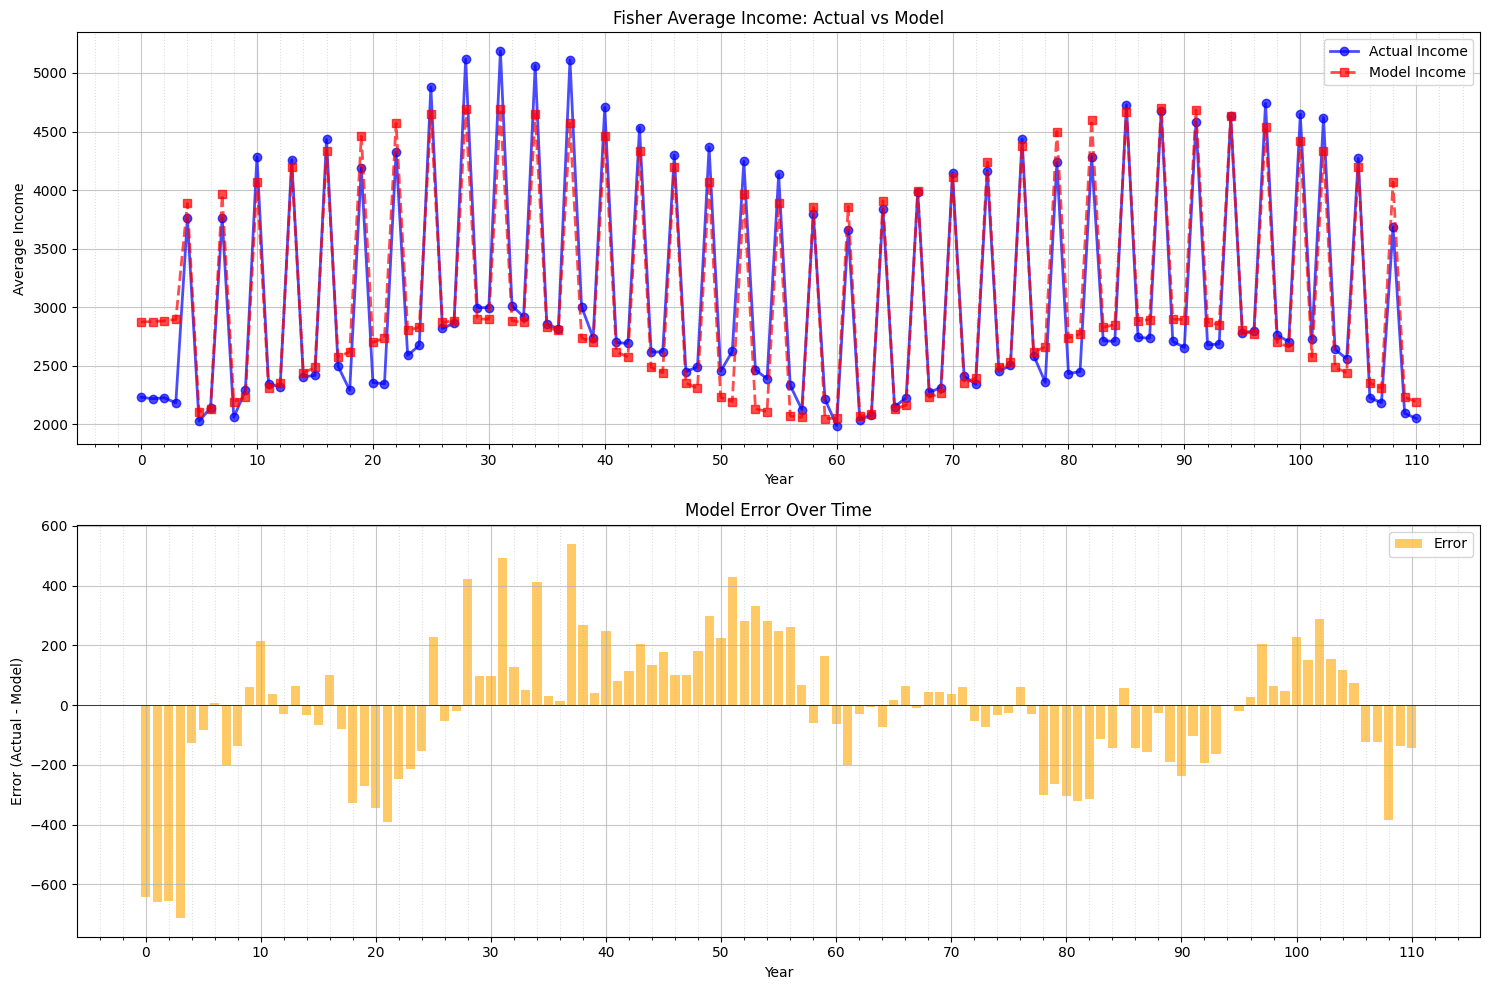

In [86]:
# Visualize actual vs modeled fisher income
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot 1: Actual vs Model
ax1 = axes[0]
ax1.plot(fisher_year_income['year'], fisher_year_income['avg_income'], 
         marker='o', linewidth=2, label='Actual Income', color='blue', alpha=0.7)
ax1.plot(fisher_year_income['year'], fisher_year_income['model_avg_income'], 
         marker='s', linewidth=2, label='Model Income', color='red', alpha=0.7, linestyle='--')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income')
ax1.set_title('Fisher Average Income: Actual vs Model')
ax1.legend()
ax1.grid(True, which='major', linestyle='-', alpha=0.7)
ax1.grid(True, which='minor', linestyle=':', alpha=0.4)
ax1.xaxis.set_major_locator(plt.MultipleLocator(10))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(2))

# Plot 2: Error over time
ax2 = axes[1]
ax2.bar(fisher_year_income['year'], fisher_year_income['error'], 
        color='orange', alpha=0.6, label='Error')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_xlabel('Year')
ax2.set_ylabel('Error (Actual - Model)')
ax2.set_title('Model Error Over Time')
ax2.legend()
ax2.grid(True, which='major', linestyle='-', alpha=0.7)
ax2.grid(True, which='minor', linestyle=':', alpha=0.4)
ax2.xaxis.set_major_locator(plt.MultipleLocator(10))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(2))

plt.tight_layout()
plt.show()

In [87]:
# Hyperparameter Tuning for Fisher Income Model
from itertools import product

def evaluate_fisher_model(params, data):
    """
    Evaluate model with given parameters and return mean squared error
    
    Parameters:
    - params: dict with keys 'baseline', 'amplitude', 'period', 'good_spike', 'bad_spike'
    - data: DataFrame with 'year' and 'avg_income' columns
    
    Returns:
    - mse: mean squared error
    """
    baseline, amplitude, period, good_spike, bad_spike = params
    
    def model(year):
        long_wave = baseline + amplitude * -(np.cos(2 * np.pi * year / period))
        
        if year < 100:
            if year >= 4 and (year - 4) % 3 == 0:
                spike = good_spike
            elif year >= 4:
                spike = bad_spike
            else:
                spike = 0
        elif year == 100:
            spike = good_spike
        elif year == 101:
            spike = bad_spike
        elif year == 102:
            spike = good_spike
        else:
            if (year - 105) % 3 == 0:
                spike = good_spike
            else:
                spike = bad_spike
        
        return long_wave + spike
    
    # Calculate predictions
    predictions = data['year'].apply(model)
    
    # Calculate MSE
    mse = np.mean((data['avg_income'] - predictions) ** 2)
    
    return mse

def tune_fisher_hyperparameters(data, param_ranges, verbose=True):
    """
    Grid search to find best hyperparameters
    
    Parameters:
    - data: DataFrame with 'year' and 'avg_income'
    - param_ranges: dict with parameter ranges
        {
            'baseline': [min, max, step],
            'amplitude': [min, max, step],
            'period': [min, max, step],
            'good_spike': [min, max, step],
            'bad_spike': [min, max, step]
        }
    - verbose: whether to print progress
    
    Returns:
    - best_params: tuple of best parameters
    - best_mse: best mean squared error
    - results_df: DataFrame with all tested combinations
    """
    # Generate parameter combinations
    baseline_range = np.arange(*param_ranges['baseline'])
    amplitude_range = np.arange(*param_ranges['amplitude'])
    period_range = np.arange(*param_ranges['period'])
    good_spike_range = np.arange(*param_ranges['good_spike'])
    bad_spike_range = np.arange(*param_ranges['bad_spike'])
    
    # Create all combinations
    param_combinations = list(product(
        baseline_range,
        amplitude_range,
        period_range,
        good_spike_range,
        bad_spike_range
    ))
    
    total_combinations = len(param_combinations)
    if verbose:
        print(f"Testing {total_combinations} parameter combinations...")
    
    # Track results
    results = []
    best_mse = float('inf')
    best_params = None
    
    # Test each combination
    for i, params in enumerate(param_combinations):
        mse = evaluate_fisher_model(params, data)
        
        results.append({
            'baseline': params[0],
            'amplitude': params[1],
            'period': params[2],
            'good_spike': params[3],
            'bad_spike': params[4],
            'mse': mse
        })
        
        if mse < best_mse:
            best_mse = mse
            best_params = params
            if verbose:
                print(f"New best MSE: {best_mse:.2f} at combination {i+1}/{total_combinations}")
                print(f"  Parameters: baseline={params[0]}, amplitude={params[1]}, period={params[2]}, "
                      f"good_spike={params[3]}, bad_spike={params[4]}")
    
    # Create results DataFrame
    results_df = pd.DataFrame(results).sort_values('mse')
    
    if verbose:
        print("\n" + "="*70)
        print("HYPERPARAMETER TUNING COMPLETE")
        print("="*70)
        print(f"\nBest Parameters:")
        print(f"  Baseline: {best_params[0]}")
        print(f"  Amplitude: {best_params[1]}")
        print(f"  Period: {best_params[2]}")
        print(f"  Good Year Spike: {best_params[3]}")
        print(f"  Bad Year Spike: {best_params[4]}")
        print(f"\nBest MSE: {best_mse:.2f}")
        print(f"Best RMSE: {np.sqrt(best_mse):.2f}")
    
    return best_params, best_mse, results_df

# Define parameter ranges to search
# Format: [min, max, step]
param_ranges = {
    'baseline': [3200, 3400, 25],      # Test 3200, 3225, 3250, 3275, 3300, 3325, 3350, 3375
    'amplitude': [300, 450, 25],        # Test 300, 325, 350, 375, 400, 425
    'period': [54, 60, 1],              # Test 54, 55, 56, 57, 58, 59
    'good_spike': [800, 1000, 25],      # Test 800, 825, 850, 875, 900, 925, 950, 975
    'bad_spike': [-900, -700, 25]       # Test -900, -875, -850, -825, -800, -775, -750, -725
}

# Run hyperparameter tuning
best_params, best_mse, results_df = tune_fisher_hyperparameters(
    fisher_year_income[['year', 'avg_income']], 
    param_ranges,
    verbose=True
)

# Display top 10 parameter combinations
print("\nTop 10 Parameter Combinations:")
print(results_df.head(10))

Testing 18432 parameter combinations...
New best MSE: 162962.79 at combination 1/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-900
New best MSE: 156960.45 at combination 2/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-875
New best MSE: 151757.65 at combination 3/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-850
New best MSE: 147354.41 at combination 4/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-825
New best MSE: 143750.71 at combination 5/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-800
New best MSE: 140946.57 at combination 6/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-775
New best MSE: 138941.97 at combination 7/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-750
New best MSE: 137736.93 at co

## Farmers

* increase of one person per year of farmers 


def farmer_income_model(year, baseline=1980, locust_penalty=1200, 
                        pos0_adj=-50, pos1_adj=-100, pos2_adj=100,
                        pos4_adj=0, pos5_adj=0, pos6_adj=-100,
                        trend_slope=-0.5):
   
    """
    Simple farmer income model based on 7-year locust cycle
    
    Parameters you can tweak:
    - baseline: base income for normal years (try: 1900-2000)
    - locust_penalty: income drop during locust years (try: 900-1100)
    - pos0_adj to pos6_adj: adjustments for each cycle position (try: -150 to +200)
    - trend_slope: long-term trend per year (try: -2 to +2)
    
    The model works like this:
    1. Start with baseline
    2. Add long-term trend (baseline + trend_slope * year)
    3. Add cycle adjustment based on position in 7-year cycle
    
    Position 3 is ALWAYS the locust year (year % 7 == 3)
    """

    # Calculate position in 7-year cycle
    cycle_pos = year % 7
    
    # Create cycle adjustments dictionary
    cycle_adj = {
        0: pos0_adj,
        1: pos1_adj,
        2: pos2_adj,
        3: -locust_penalty,  # LOCUST YEAR
        4: pos4_adj,
        5: pos5_adj,
        6: pos6_adj
    }
    
    # Base income with long-term trend
    base = baseline + (trend_slope * year)
    
    # Add cycle adjustment
    adjustment = cycle_adj[cycle_pos]

    
    return base + adjustment

In [88]:
# Filter for farmers
farmer_pd = all_profession[all_profession['profession'] == 'farmer']
farmer_pd = farmer_pd.reset_index(drop=True)

# Create summary statistics by year
farmer_year_income = np.round(farmer_pd.groupby('year')['income'].mean().reset_index(), 2)
farmer_year_income = farmer_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
farmer_year_income['sum_income'] = np.round(farmer_pd.groupby('year')['income'].sum().values, 2)
farmer_year_income['num_farmers'] = np.round(farmer_pd.groupby('year')['income'].count().values, 2)
farmer_year_income['avg_income_per_farmer'] = np.round(farmer_year_income['sum_income'] / farmer_year_income['num_farmers'], 2)
farmer_year_income['avg_net_worth'] = np.round(farmer_pd.groupby('year')['net_worth'].mean().values, 2)
farmer_year_income['sum_net_worth'] = np.round(farmer_pd.groupby('year')['net_worth'].sum().values, 2)
farmer_year_income['avg_net_worth_per_farmer'] = np.round(farmer_year_income['sum_net_worth'] / farmer_year_income['num_farmers'], 2)

# Reorder the columns 
order_columns = ['year', 'num_farmers', 'avg_income', 'sum_income', 'avg_income_per_farmer', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_farmer']
farmer_year_income = farmer_year_income[order_columns]

# Display first 15 rows
farmer_year_income.head(15)

year  num_farmers  avg_income  sum_income  avg_income_per_farmer  \
0      0           73     2182.73   159339.04                2182.73   
1      1           75     2212.96   165972.21                2212.96   
2      2           75     2243.49   168261.99                2243.49   
3      3           77      637.74    49106.05                 637.74   
4      4           75     1987.35   149051.48                1987.35   
5      5           75     2038.61   152895.40                2038.61   
6      6           75     1862.83   139712.40                1862.83   
7      7           75      872.61    65445.64                 872.61   
8      8           76      874.13    66433.98                 874.13   
9      9           75     1979.79   148484.01                1979.79   
10    10           75      686.14    51460.50                 686.14   
11    11           76     2207.97   167805.97                2207.97   
12    12           75     2067.58   155068.56                2067.58   
13    13           76     2146.66   163146.53                2146.66   
14    14           76     2250.05   171003.75                2250.05   

    avg_net_worth  sum_net_worth  avg_net_worth_per_farmer  
0        10000.00      730000.00                  10000.00  
1        10832.56      812441.90                  10832.56  
2        11660.32      874524.18                  11660.32  
3        11649.66      897023.90                  11649.66  
4        12259.12      919434.09                  12259.12  
5        13022.52      976688.97                  13022.52  
6        13618.98     1021423.67                  13618.98  
7        13731.85     1029888.97                  13731.85  
8        13783.41     1047538.84                  13783.41  
9        14246.15     1068461.08                  14246.15  
10       14060.73     1054554.93                  14060.73  
11       14813.26     1125808.04                  14813.26  
12       15242.84     1143213.06                  15242.84  
13       15771.05     1198599.94                  15771.05  
14       16424.27     1248244.55                  16424.27

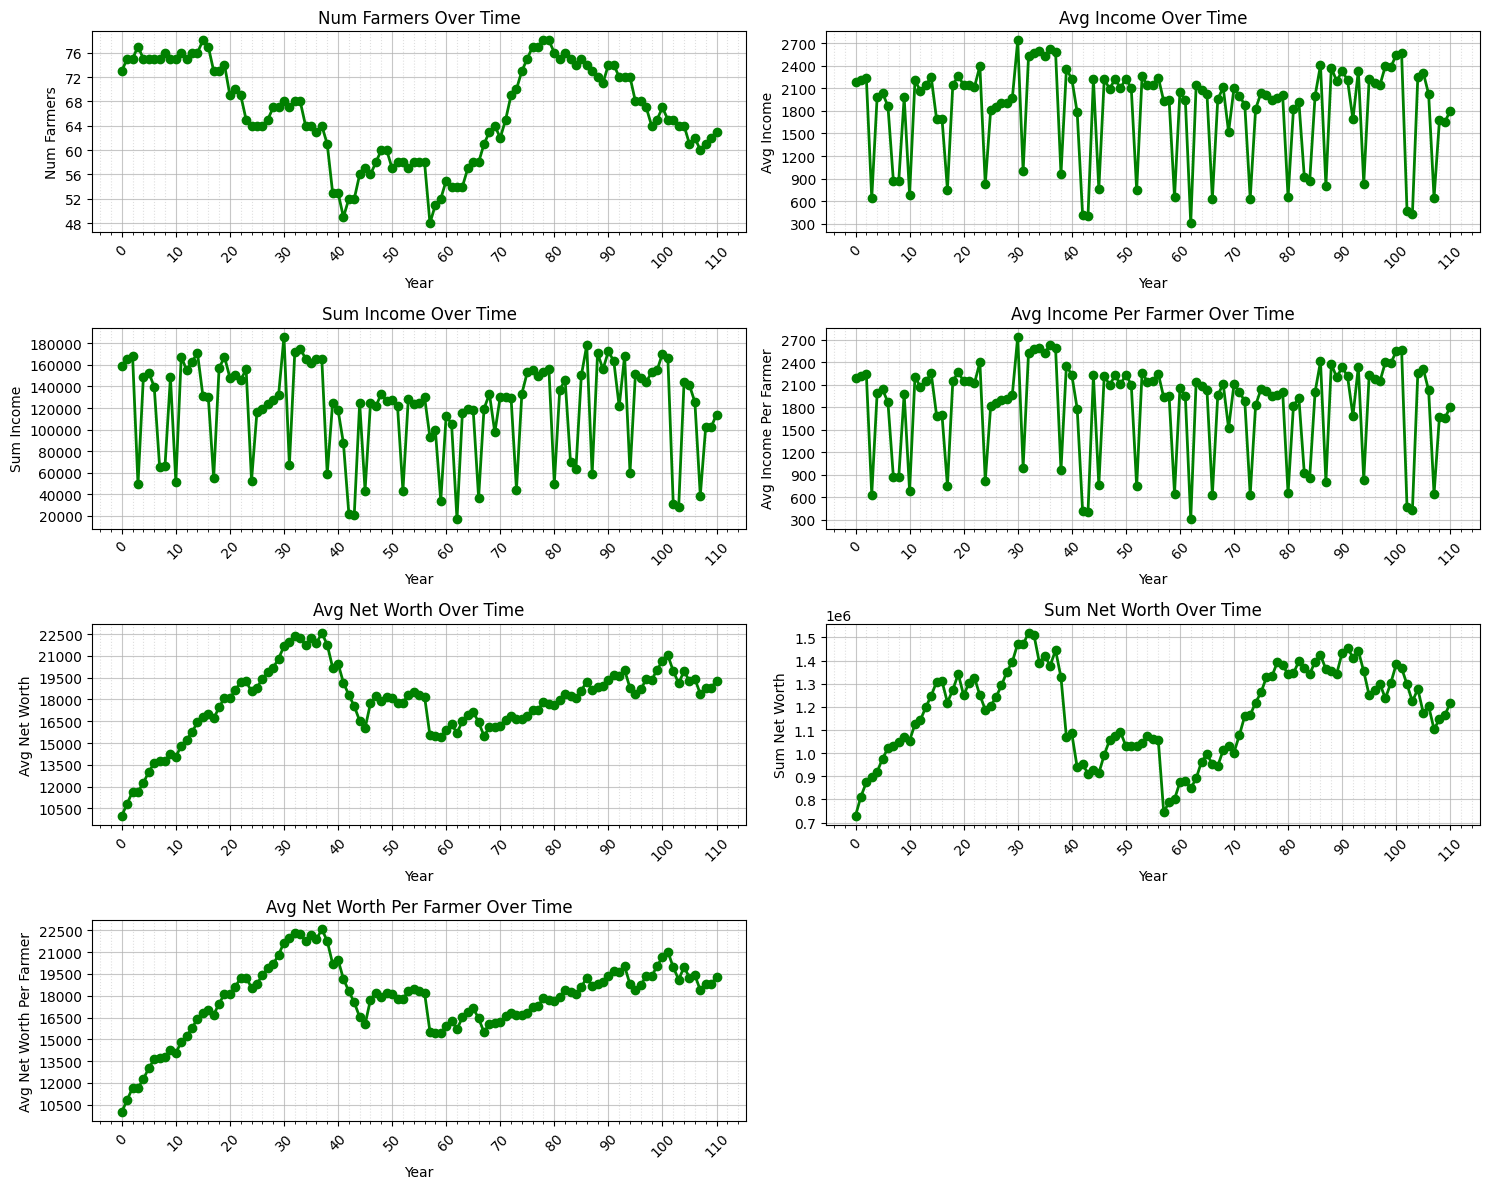

In [89]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in farmer_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(farmer_year_income['year'], farmer_year_income[var], marker='o', linewidth=2, color='green')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

### Prep

STEP 1: IDENTIFY LOCUST INFESTATION YEARS

Years with low income (< 1686.81):
[  3   7   8  10  17  24  31  38  42  43  45  52  59  62  66  69  73  80
  83  84  87  92  94 102 103 107 108 109]

Differences between consecutive low years:
[4 1 2 7 7 7 7 4 1 2 7 7 3 4 3 4 7 3 1 3 5 2 8 1 4 1 1]
Average interval: 3.93 years
Most common interval: ModeResult(mode=np.int64(3), count=np.int64(1))

STEP 2: CATEGORIZE YEARS BY INCOME LEVEL

Income distribution by category:
income_level
Low (Locust)    24
Medium           7
High            79
Name: count, dtype: int64

Year-by-year pattern (first 30 years):
Year   0: 🌾 2182.73 - High
Year   1: 🌾 2212.96 - High
Year   2: 🌾 2243.49 - High
Year   3: 🦗 637.74 - Low (Locust)
Year   4: 🌾 1987.35 - High
Year   5: 🌾 2038.61 - High
Year   6: 🌾 1862.83 - High
Year   7: 🦗 872.61 - Low (Locust)
Year   8: 🦗 874.13 - Low (Locust)
Year   9: 🌾 1979.79 - High
Year  10: 🦗 686.14 - Low (Locust)
Year  11: 🌾 2207.97 - High
Year  12: 🌾 2067.58 - High
Year  13: 🌾 2146.

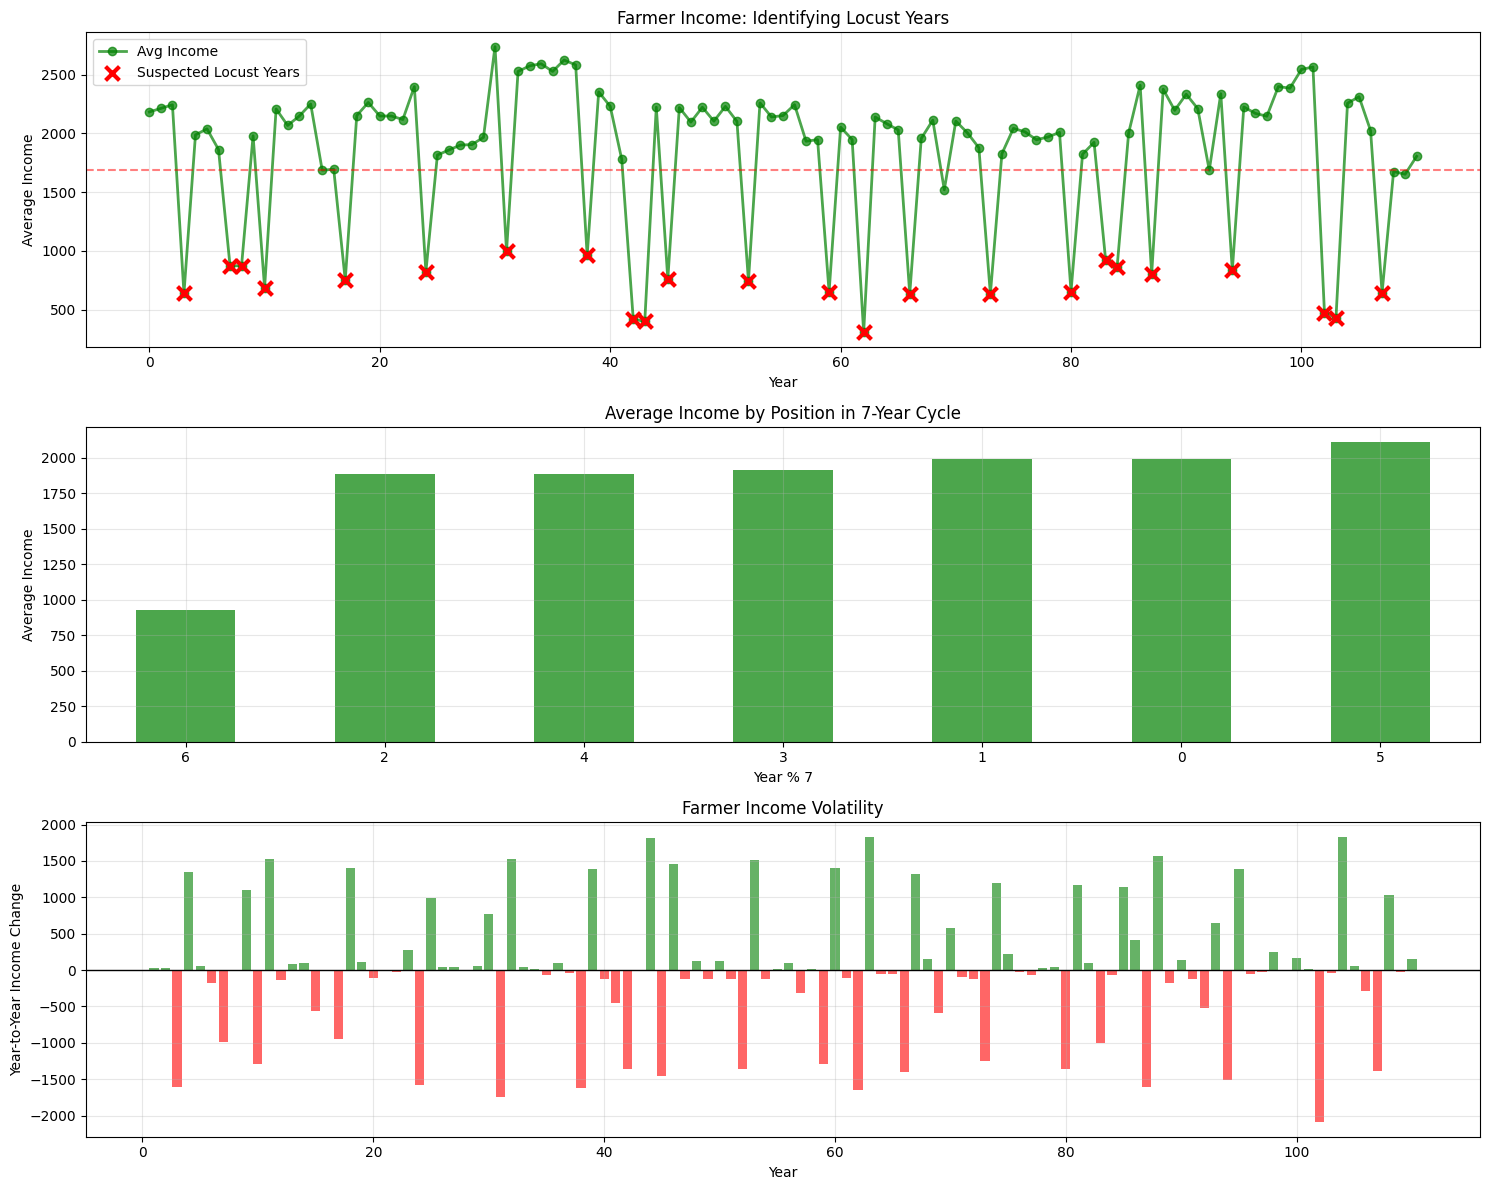


STEP 6: PATTERN HYPOTHESIS

Based on the analysis, the pattern likely follows:
1. Every 7 years: Locust infestation (LOW income)
2. Year after locust: Recovery/rebuilding (MEDIUM income)
3. Years 2-5 after locust: Normal/good farming (HIGH income)
4. Year 6 after locust: Slight decline before next locust (MEDIUM income)

Additional factors to consider:
- Long-term trends (population growth, climate change)
- Random year-to-year variation (weather)
- Possible interaction with fisher cycles


In [90]:


from scipy.stats import mode

# Farmer Income Pattern Analysis

# 1. First, let's identify the low income years (likely locust years)
print("="*70)
print("STEP 1: IDENTIFY LOCUST INFESTATION YEARS")
print("="*70)

# Find years with significantly lower income (bottom 20%)
threshold = farmer_year_income['avg_income'].quantile(0.25)
low_income_years = farmer_year_income[farmer_year_income['avg_income'] < threshold]['year'].values

print(f"\nYears with low income (< {threshold:.2f}):")
print(low_income_years)

# Check if there's a 7-year pattern
print("\nDifferences between consecutive low years:")
if len(low_income_years) > 1:
    diffs = np.diff(low_income_years)
    print(diffs)
    print(f"Average interval: {diffs.mean():.2f} years")
# check the mode of the pattern
mode_intervals= mode(low_income_years)
print(f"Most common interval: {mode_intervals}")


# 2. Analyze the pattern of high vs low years
print("\n" + "="*70)
print("STEP 2: CATEGORIZE YEARS BY INCOME LEVEL")
print("="*70)

# Create income categories
farmer_year_income['income_level'] = pd.cut(
    farmer_year_income['avg_income'], 
    bins=[0, 1000, 1800, 2700],
    labels=['Low (Locust)', 'Medium', 'High']
)

print("\nIncome distribution by category:")
print(farmer_year_income['income_level'].value_counts().sort_index())

# Show the pattern
print("\nYear-by-year pattern (first 30 years):")
for _, row in farmer_year_income.head(30).iterrows():
    symbol = "🦗" if row['income_level'] == 'Low (Locust)' else ("🌾" if row['income_level'] == 'High' else "🌱")
    print(f"Year {int(row['year']):3d}: {symbol} {row['avg_income']:6.2f} - {row['income_level']}")

# 3. Analyze potential 7-year locust cycle
print("\n" + "="*70)
print("STEP 3: TEST 7-YEAR LOCUST CYCLE HYPOTHESIS")
print("="*70)

# Check years modulo 7
farmer_year_income['year_mod_7'] = (farmer_year_income['year'] + 3) % 7
avg_by_mod7 = farmer_year_income.groupby('year_mod_7')['avg_income'].mean().sort_values()

print("\nAverage income by (year % 7):")
print(avg_by_mod7)
print(f"\nLowest income at year % 7 = {avg_by_mod7.idxmin()}")

# 4. Detect cycles and periodicities
print("\n" + "="*70)
print("STEP 4: IDENTIFY ADDITIONAL CYCLES")
print("="*70)

# Look for other patterns - 2-year alternating pattern after locust year?
farmer_year_income['income_change'] = farmer_year_income['avg_income'].diff()
print("\nLargest income increases (recovery years after locusts?):")
print(farmer_year_income.nlargest(10, 'income_change')[['year', 'avg_income', 'income_change']])

print("\nLargest income decreases (locust attack years?):")
print(farmer_year_income.nsmallest(10, 'income_change')[['year', 'avg_income', 'income_change']])

# 5. Visualize the pattern
print("\n" + "="*70)
print("STEP 5: VISUALIZE PATTERNS")
print("="*70)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# Plot 1: Income over time with locust years highlighted
ax1 = axes[0]
ax1.plot(farmer_year_income['year'], farmer_year_income['avg_income'], 
         marker='o', linewidth=2, color='green', alpha=0.7, label='Avg Income')

# Highlight suspected locust years
locust_mask = farmer_year_income['income_level'] == 'Low (Locust)'
ax1.scatter(farmer_year_income[locust_mask]['year'], 
           farmer_year_income[locust_mask]['avg_income'],
           color='red', s=100, marker='x', linewidths=3, 
           label='Suspected Locust Years', zorder=5)

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income')
ax1.set_title('Farmer Income: Identifying Locust Years')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=threshold, color='red', linestyle='--', alpha=0.5, label='Low Income Threshold')

# Plot 2: Income by year mod 7
ax2 = axes[1]
avg_by_mod7.plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_xlabel('Year % 7')
ax2.set_ylabel('Average Income')
ax2.set_title('Average Income by Position in 7-Year Cycle')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Year-to-year change
ax3 = axes[2]
ax3.bar(farmer_year_income['year'], farmer_year_income['income_change'], 
        color=['red' if x < 0 else 'green' for x in farmer_year_income['income_change']],
        alpha=0.6)
ax3.axhline(y=0, color='black', linewidth=1)
ax3.set_xlabel('Year')
ax3.set_ylabel('Year-to-Year Income Change')
ax3.set_title('Farmer Income Volatility')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Propose pattern hypothesis
print("\n" + "="*70)
print("STEP 6: PATTERN HYPOTHESIS")
print("="*70)

print("\nBased on the analysis, the pattern likely follows:")
print("1. Every 7 years: Locust infestation (LOW income)")
print("2. Year after locust: Recovery/rebuilding (MEDIUM income)")
print("3. Years 2-5 after locust: Normal/good farming (HIGH income)")
print("4. Year 6 after locust: Slight decline before next locust (MEDIUM income)")
print("\nAdditional factors to consider:")
print("- Long-term trends (population growth, climate change)")
print("- Random year-to-year variation (weather)")
print("- Possible interaction with fisher cycles")

STEP 7: DETAILED LOCUST CYCLE ANALYSIS

Predicted locust years (year % 7 == 3): [  3  10  17  24  31  38  45  52  59  66  73  80  87  94 101 108]...

Actual low income years: [ 3  7  8 10 17 24 31 38 42 43 45 52 59 62 66 69 73 80 83 84]...

Overlap: 15 out of 16 predicted
Accuracy: 93.8%

STEP 8: MODEL THE WITHIN-CYCLE PATTERN

Income statistics by position in 7-year cycle:
               avg_income                         
                     mean     std     min      max
cycle_position                                    
0                 1914.05  619.88  417.21  2527.64
1                 1887.68  546.54  401.56  2624.22
2                 2110.08  483.02  643.78  2738.53
3                  925.47  506.16  632.73  2565.10
4                 1994.13  471.32  471.80  2526.91
5                 1993.68  454.04  432.50  2574.68
6                 1887.05  585.85  305.72  2592.63

STEP 9: IDENTIFY LONG-TERM TRENDS

Rolling average (non-locust years):
    year  avg_income  detrended_income  r

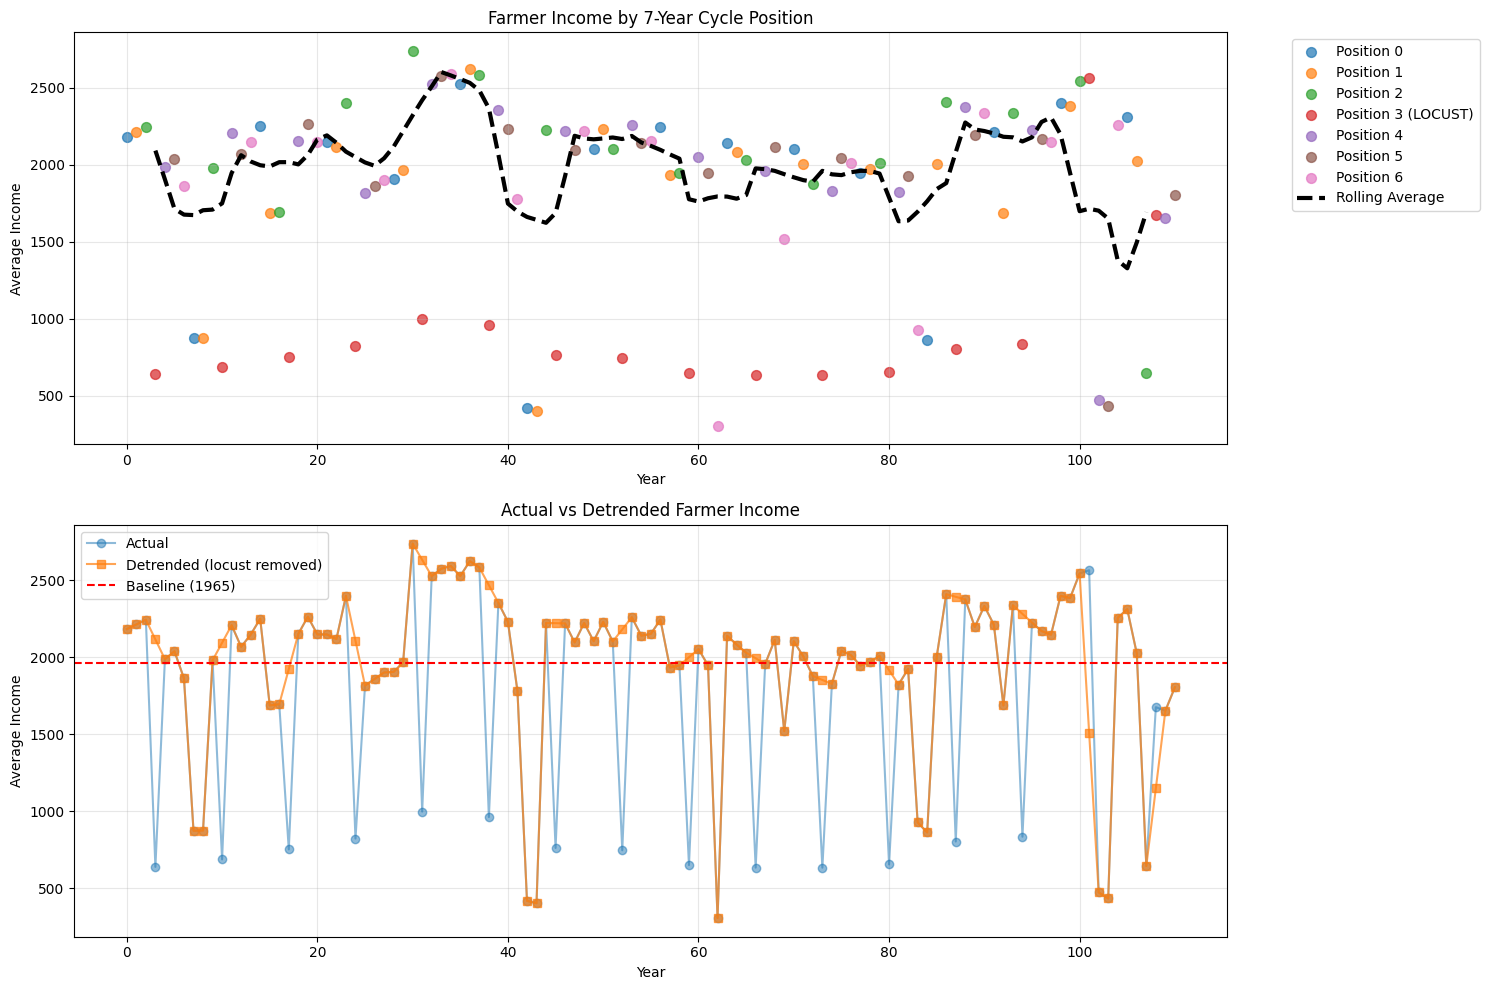


MODEL EQUATION PROPOSAL

Proposed Model:
  avg_income(year) = baseline + cycle_adjustment[year % 7] + trend_component

Where:
  • Baseline = 1965.26
  • Locust penalty (position 3) = -1039.79
  • Other positions may have small variations

Next steps:
  1. Test for long-term trends (population, climate)
  2. Fine-tune cycle adjustments
  3. Use hyperparameter tuning to optimize


In [91]:
# Advanced Farmer Income Pattern Analysis
print("="*70)
print("STEP 7: DETAILED LOCUST CYCLE ANALYSIS")
print("="*70)

# The bar chart shows year_mod_7 = 6 has lowest income
# This means locust years occur when (year + 3) % 7 = 6
# Which is equivalent to year % 7 = 3

# Let's identify all locust years based on this pattern
farmer_year_income['is_locust_year'] = (farmer_year_income['year'] % 7) == 3

# Check how well this matches the low income years
predicted_locust = farmer_year_income[farmer_year_income['is_locust_year']]['year'].values
actual_locust = low_income_years

print(f"\nPredicted locust years (year % 7 == 3): {predicted_locust[:20]}...")
print(f"\nActual low income years: {actual_locust[:20]}...")

# Compare
overlap = set(predicted_locust) & set(actual_locust)
print(f"\nOverlap: {len(overlap)} out of {len(predicted_locust)} predicted")
print(f"Accuracy: {len(overlap)/len(predicted_locust)*100:.1f}%")

# 8. Analyze the 7-year cycle pattern
print("\n" + "="*70)
print("STEP 8: MODEL THE WITHIN-CYCLE PATTERN")
print("="*70)

# For each position in the 7-year cycle, what's the typical income?
farmer_year_income['cycle_position'] = farmer_year_income['year'] % 7

cycle_pattern = farmer_year_income.groupby('cycle_position').agg({
    'avg_income': ['mean', 'std', 'min', 'max']
}).round(2)

print("\nIncome statistics by position in 7-year cycle:")
print(cycle_pattern)

# 9. Try to identify additional patterns
print("\n" + "="*70)
print("STEP 9: IDENTIFY LONG-TERM TRENDS")
print("="*70)

# Remove locust effect to see underlying trend
farmer_year_income['detrended_income'] = farmer_year_income['avg_income'].copy()
farmer_year_income.loc[farmer_year_income['is_locust_year'], 'detrended_income'] = np.nan

# Interpolate to fill locust years
farmer_year_income['detrended_income'] = farmer_year_income['detrended_income'].interpolate()

# Check for long-term trends
from scipy.signal import detrend

# Calculate rolling average to see trend
farmer_year_income['rolling_avg'] = farmer_year_income['detrended_income'].rolling(window=7, center=True).mean()

print("\nRolling average (non-locust years):")
print(farmer_year_income[['year', 'avg_income', 'detrended_income', 'rolling_avg']].head(20))

# 10. Propose initial model
print("\n" + "="*70)
print("STEP 10: PROPOSE INITIAL MODEL")
print("="*70)

# Calculate baseline (average of non-locust years)
baseline = farmer_year_income[~farmer_year_income['is_locust_year']]['avg_income'].mean()
locust_penalty = baseline - farmer_year_income[farmer_year_income['is_locust_year']]['avg_income'].mean()

print(f"\nBaseline income (normal years): {baseline:.2f}")
print(f"Average locust penalty: {locust_penalty:.2f}")

# Check for variation within the cycle (excluding locust years)
non_locust = farmer_year_income[~farmer_year_income['is_locust_year']]
cycle_variation = non_locust.groupby('cycle_position')['avg_income'].mean()

print("\nAverage income by cycle position (non-locust years only):")
print(cycle_variation.round(2))

# Visualize the proposed model
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot 1: Show the 7-year pattern clearly
ax1 = axes[0]
for cycle_pos in range(7):
    subset = farmer_year_income[farmer_year_income['cycle_position'] == cycle_pos]
    ax1.scatter(subset['year'], subset['avg_income'], 
               label=f'Position {cycle_pos}' + (' (LOCUST)' if cycle_pos == 3 else ''),
               alpha=0.7, s=50)

ax1.plot(farmer_year_income['year'], farmer_year_income['rolling_avg'], 
         color='black', linewidth=3, label='Rolling Average', linestyle='--')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income')
ax1.set_title('Farmer Income by 7-Year Cycle Position')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Detrended data
ax2 = axes[1]
ax2.plot(farmer_year_income['year'], farmer_year_income['avg_income'], 
         'o-', alpha=0.5, label='Actual')
ax2.plot(farmer_year_income['year'], farmer_year_income['detrended_income'], 
         's-', alpha=0.7, label='Detrended (locust removed)')
ax2.axhline(y=baseline, color='red', linestyle='--', label=f'Baseline ({baseline:.0f})')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Income')
ax2.set_title('Actual vs Detrended Farmer Income')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("MODEL EQUATION PROPOSAL")
print("="*70)
print("\nProposed Model:")
print("  avg_income(year) = baseline + cycle_adjustment[year % 7] + trend_component")
print("\nWhere:")
print(f"  • Baseline = {baseline:.2f}")
print(f"  • Locust penalty (position 3) = -{locust_penalty:.2f}")
print("  • Other positions may have small variations")
print("\nNext steps:")
print("  1. Test for long-term trends (population, climate)")
print("  2. Fine-tune cycle adjustments")
print("  3. Use hyperparameter tuning to optimize")

CALCULATING EXPONENTIAL MOVING AVERAGE

EMA calculations complete!
Short-term EMA (span=5): More reactive
Medium-term EMA (span=10): Balanced
Long-term EMA (span=20): Smoother


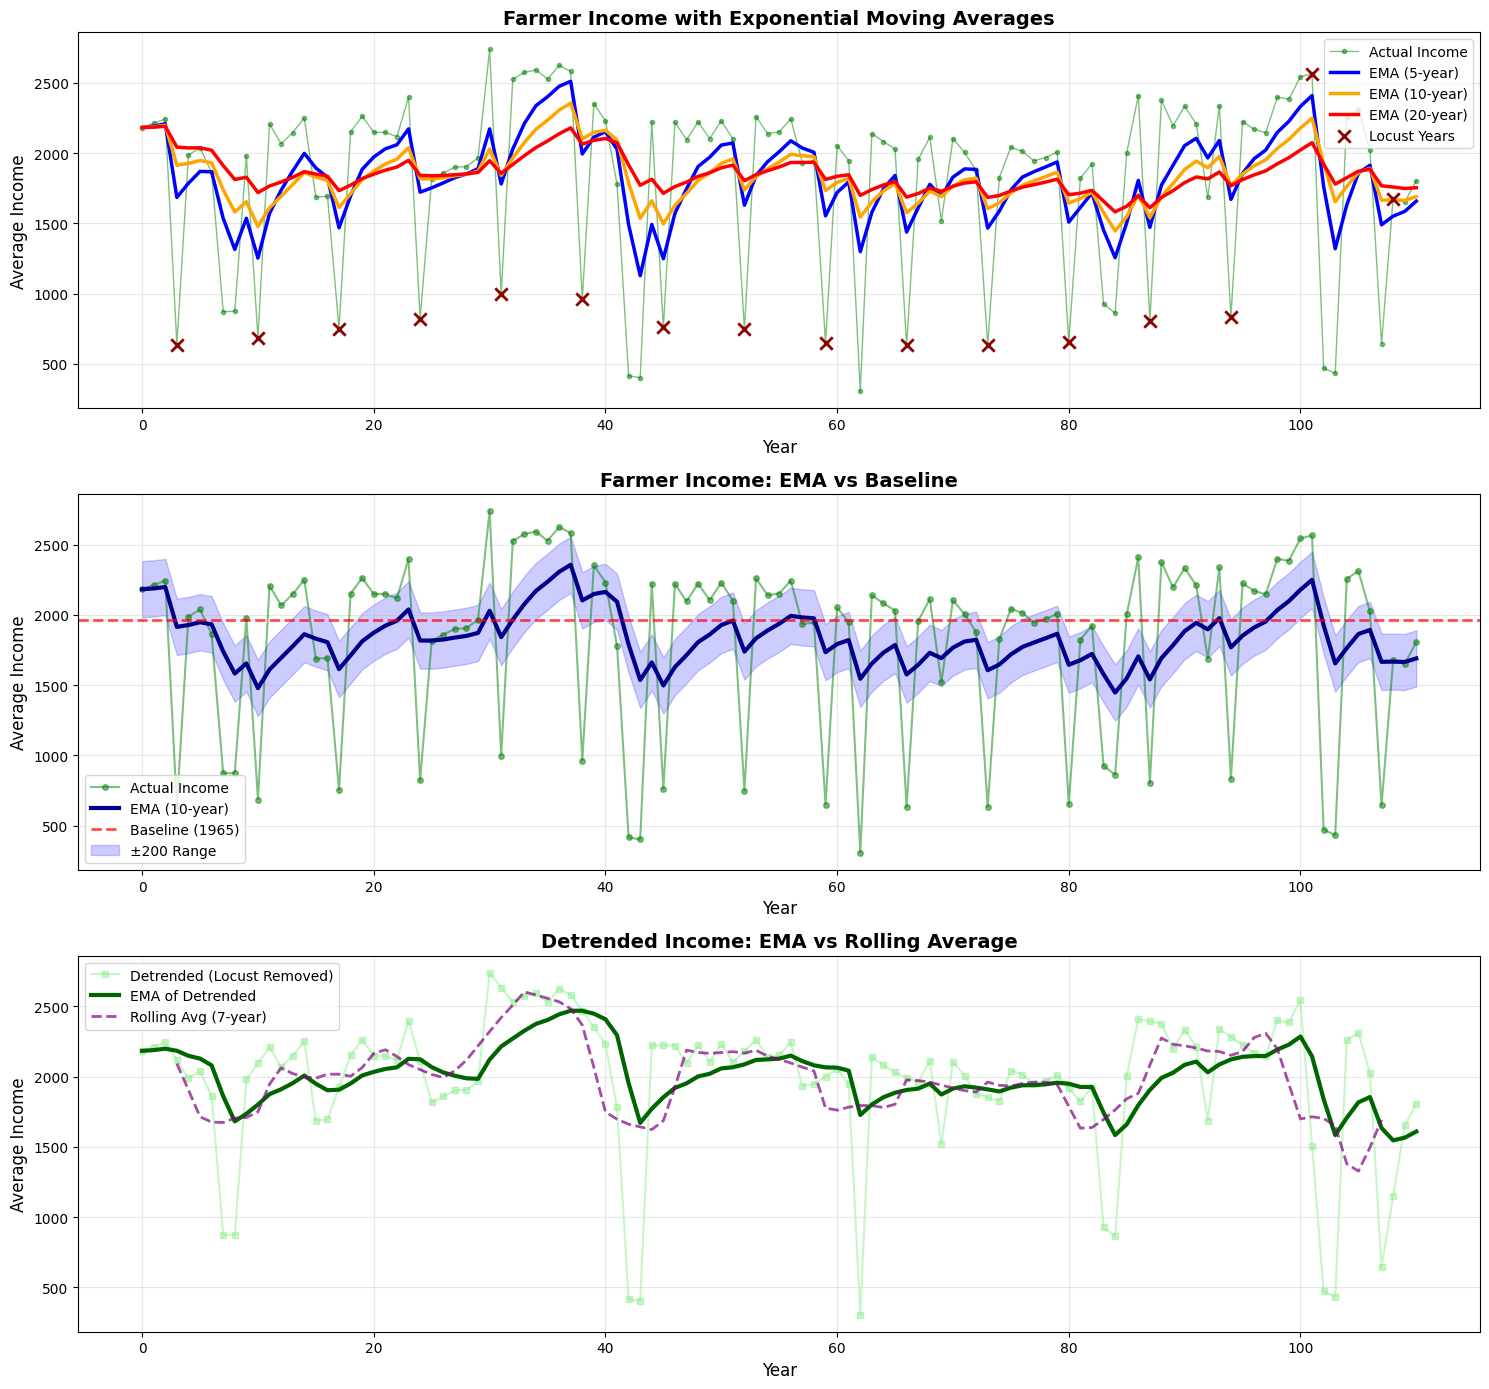


EMA STATISTICS

Actual Income - Mean: 1815.38, Std: 633.99
EMA (5-year)  - Mean: 1824.82, Std: 281.61
EMA (10-year) - Mean: 1835.35, Std: 190.52
EMA (20-year) - Mean: 1852.04, Std: 129.99

SAMPLE DATA WITH EMA
    year  avg_income    ema_short   ema_medium     ema_long
0      0     2182.73  2182.730000  2182.730000  2182.730000
1      1     2212.96  2192.806667  2188.226364  2185.609048
2      2     2243.49  2209.701111  2198.274298  2191.121519
3      3      637.74  1685.714074  1914.540789  2043.180422
4      4     1987.35  1786.259383  1927.778827  2037.863239
5      5     2038.61  1870.376255  1947.929950  2037.934359
6      6     1862.83  1867.860837  1932.457231  2021.257754
7      7      872.61  1536.110558  1739.757735  1911.862729
8      8      874.13  1315.450372  1582.370874  1813.031041
9      9     1979.79  1536.896915  1654.628897  1828.912847
10    10      686.14  1253.311276  1478.540007  1720.077337
11    11     2207.97  1571.530851  1611.163642  1766.543305
12    12 

In [92]:
# Calculate Exponential Moving Average (EMA)
print("="*70)
print("CALCULATING EXPONENTIAL MOVING AVERAGE")
print("="*70)

# EMA with different span values (smoothing factor)
# Smaller span = more reactive to recent changes
# Larger span = smoother, less reactive

farmer_year_income['ema_short'] = farmer_year_income['avg_income'].ewm(span=5, adjust=False).mean()
farmer_year_income['ema_medium'] = farmer_year_income['avg_income'].ewm(span=10, adjust=False).mean()
farmer_year_income['ema_long'] = farmer_year_income['avg_income'].ewm(span=20, adjust=False).mean()

# Also calculate for detrended income (without locust years)
farmer_year_income['ema_detrended'] = farmer_year_income['detrended_income'].ewm(span=10, adjust=False).mean()

print(f"\nEMA calculations complete!")
print(f"Short-term EMA (span=5): More reactive")
print(f"Medium-term EMA (span=10): Balanced")
print(f"Long-term EMA (span=20): Smoother")

# Visualize with EMA
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 14))

# Plot 1: Actual income with multiple EMAs
ax1 = axes[0]
ax1.plot(farmer_year_income['year'], farmer_year_income['avg_income'], 
         marker='o', linewidth=1, color='green', alpha=0.5, label='Actual Income', markersize=3)
ax1.plot(farmer_year_income['year'], farmer_year_income['ema_short'], 
         linewidth=2.5, color='blue', label='EMA (5-year)', linestyle='-')
ax1.plot(farmer_year_income['year'], farmer_year_income['ema_medium'], 
         linewidth=2.5, color='orange', label='EMA (10-year)', linestyle='-')
ax1.plot(farmer_year_income['year'], farmer_year_income['ema_long'], 
         linewidth=2.5, color='red', label='EMA (20-year)', linestyle='-')

# Highlight locust years
locust_mask = farmer_year_income['is_locust_year']
ax1.scatter(farmer_year_income[locust_mask]['year'], 
           farmer_year_income[locust_mask]['avg_income'],
           color='darkred', s=80, marker='x', linewidths=2, 
           label='Locust Years', zorder=5)

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Income', fontsize=12)
ax1.set_title('Farmer Income with Exponential Moving Averages', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Compare actual vs EMA with baseline
ax2 = axes[1]
ax2.plot(farmer_year_income['year'], farmer_year_income['avg_income'], 
         'o-', alpha=0.5, label='Actual Income', color='green', markersize=4)
ax2.plot(farmer_year_income['year'], farmer_year_income['ema_medium'], 
         linewidth=3, color='darkblue', label='EMA (10-year)', linestyle='-')
ax2.axhline(y=baseline, color='red', linestyle='--', linewidth=2, 
            label=f'Baseline ({baseline:.0f})', alpha=0.7)
ax2.fill_between(farmer_year_income['year'], 
                  farmer_year_income['ema_medium'] - 200, 
                  farmer_year_income['ema_medium'] + 200,
                  alpha=0.2, color='blue', label='±200 Range')

ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Average Income', fontsize=12)
ax2.set_title('Farmer Income: EMA vs Baseline', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: Detrended income with EMA (locust effect removed)
ax3 = axes[2]
ax3.plot(farmer_year_income['year'], farmer_year_income['detrended_income'], 
         's-', alpha=0.5, label='Detrended (Locust Removed)', color='lightgreen', markersize=4)
ax3.plot(farmer_year_income['year'], farmer_year_income['ema_detrended'], 
         linewidth=3, color='darkgreen', label='EMA of Detrended', linestyle='-')
ax3.plot(farmer_year_income['year'], farmer_year_income['rolling_avg'], 
         linewidth=2, color='purple', label='Rolling Avg (7-year)', linestyle='--', alpha=0.7)

ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Average Income', fontsize=12)
ax3.set_title('Detrended Income: EMA vs Rolling Average', fontsize=14, fontweight='bold')
ax3.legend(loc='best', fontsize=10)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
print("\n" + "="*70)
print("EMA STATISTICS")
print("="*70)
print(f"\nActual Income - Mean: {farmer_year_income['avg_income'].mean():.2f}, Std: {farmer_year_income['avg_income'].std():.2f}")
print(f"EMA (5-year)  - Mean: {farmer_year_income['ema_short'].mean():.2f}, Std: {farmer_year_income['ema_short'].std():.2f}")
print(f"EMA (10-year) - Mean: {farmer_year_income['ema_medium'].mean():.2f}, Std: {farmer_year_income['ema_medium'].std():.2f}")
print(f"EMA (20-year) - Mean: {farmer_year_income['ema_long'].mean():.2f}, Std: {farmer_year_income['ema_long'].std():.2f}")

# Show a sample of the data
print("\n" + "="*70)
print("SAMPLE DATA WITH EMA")
print("="*70)
print(farmer_year_income[['year', 'avg_income', 'ema_short', 'ema_medium', 'ema_long']].head(20))

1975            1025         -0.5       -50       -50       100        50        50  

Best Parameters:
  Baseline: 1980
  Locust Penalty: 1050
  Trend Slope: 0.00
  Position 0 Adjustment: -50
  Position 1 Adjustment: -100
  Position 2 Adjustment: 100
  Position 4 Adjustment: 0
  Position 5 Adjustment: 0
  Position 6 Adjustment: -100

Best MSE: 259846.69
Best RMSE: 509.75

### MODEL

FARMER INCOME MODEL - MANUAL TWEAKING

📊 TESTING INITIAL PARAMETERS

✅ MODEL PERFORMANCE:
   Mean Absolute Error (MAE): 344.02
   Root Mean Squared Error (RMSE): 514.70
   Max Absolute Error: 1835.60
   Mean % Error: -16.01%

📈 ERROR BY CYCLE POSITION:
   Position 0: 458.19
   Position 1: 383.39
   Position 2: 329.32
   Position 3 🦗 (LOCUST): 257.06
   Position 4: 306.79
   Position 5: 260.14
   Position 6: 417.87

📋 SAMPLE PREDICTIONS (Years 0-30):
 year  cycle_position  avg_income  model_income  model_error  is_locust_year
    0               0     2182.73        1930.0       252.73           False
    1               1     2212.96        1879.5       333.46           False
    2               2     2243.49        2079.0       164.49           False
    3               3      637.74         778.5      -140.76            True
    4               4     1987.35        1978.0         9.35           False
    5               5     2038.61        1977.5        61.11           False
    6  

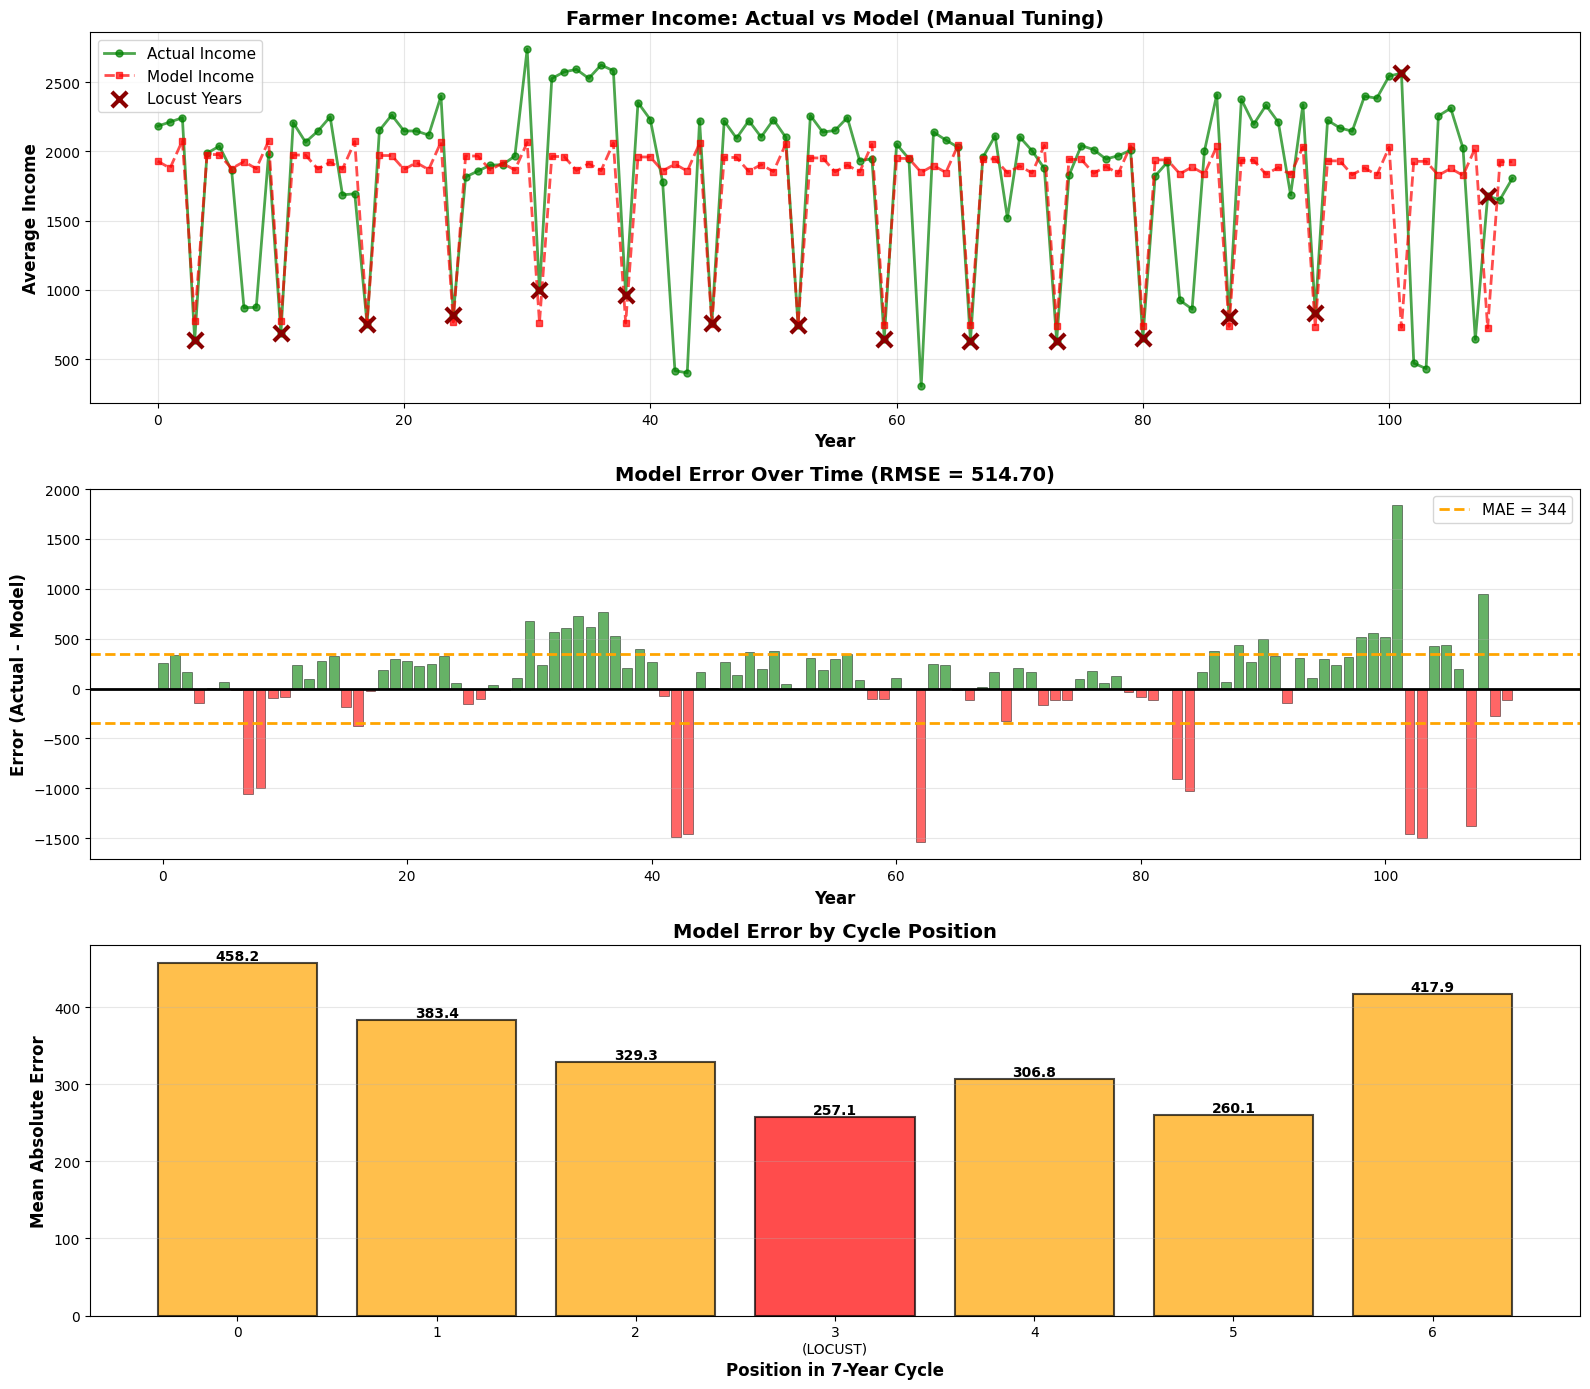


🎛️  CURRENT MODEL PARAMETERS

baseline        = 1965    # Base income for normal years
locust_penalty  = 1040    # Income drop during locust years
trend_slope     = 0       # Long-term trend per year
anomaly_boost   = 600     # Boost for years 100+

Cycle Adjustments (deviations from baseline):
  pos0_adj = -51    # Position 0
  pos1_adj = -78    # Position 1
  pos2_adj = 145    # Position 2 (good year before locust)
  pos4_adj = 29     # Position 4 (recovery after locust)
  pos5_adj = 28     # Position 5
  pos6_adj = -78    # Position 6 (decline before locust)


💡 TIPS FOR MANUAL TUNING

1. Start with BASELINE: Adjust to match the average non-locust income
   - If model is consistently HIGH → decrease baseline
   - If model is consistently LOW → increase baseline

2. Adjust LOCUST_PENALTY: Control the depth of locust year drops
   - If locust years are TOO LOW → decrease penalty
   - If locust years are TOO HIGH → increase penalty

3. Fine-tune CYCLE ADJUSTMENTS: Match the pattern wi

In [93]:
# Farmer Income Model - Manual Parameter Tuning
print("="*70)
print("FARMER INCOME MODEL - MANUAL TWEAKING")
print("="*70)

def farmer_income_model(year, baseline=1980, locust_penalty=1200, 
                        pos0_adj=-50, pos1_adj=-100, pos2_adj=100,
                        pos4_adj=0, pos5_adj=0, pos6_adj=-100,
                        trend_slope=-0.5, anomaly_boost=0):
    """
    Simple farmer income model based on 7-year locust cycle
    
    Parameters you can tweak:
    - baseline: base income for normal years (try: 1900-2000)
    - locust_penalty: income drop during locust years (try: 900-1100)
    - pos0_adj to pos6_adj: adjustments for each cycle position (try: -150 to +200)
    - trend_slope: long-term trend per year (try: -2 to +2)
    
    The model works like this:
    1. Start with baseline
    2. Add long-term trend (baseline + trend_slope * year)
    3. Add cycle adjustment based on position in 7-year cycle
    
    Position 3 is ALWAYS the locust year (year % 7 == 3)
    """
    # Calculate position in 7-year cycle
    cycle_pos = year % 7
    
    # Create cycle adjustments dictionary
    cycle_adj = {
        0: pos0_adj,
        1: pos1_adj,
        2: pos2_adj,
        3: -locust_penalty,  # LOCUST YEAR
        4: pos4_adj,
        5: pos5_adj,
        6: pos6_adj
    }
    
    # Base income with long-term trend
    base = baseline + (trend_slope * year)
    
    # Add cycle adjustment
    adjustment = cycle_adj[cycle_pos]

    # Add anomaly boost for years 100+
    if year >= 100:
        adjustment += anomaly_boost

    
    return base + adjustment

# Test with initial parameters (based on your analysis)
print("\n📊 TESTING INITIAL PARAMETERS")
print("="*70)

# Apply model
farmer_year_income['model_income'] = farmer_year_income['year'].apply(
    farmer_income_model
)

# Calculate errors
farmer_year_income['model_error'] = farmer_year_income['avg_income'] - farmer_year_income['model_income']
farmer_year_income['model_abs_error'] = np.abs(farmer_year_income['model_error'])
farmer_year_income['model_pct_error'] = np.round(
    100 * farmer_year_income['model_error'] / farmer_year_income['avg_income'], 2
)

# Show performance metrics
mae = farmer_year_income['model_abs_error'].mean()
rmse = np.sqrt((farmer_year_income['model_error']**2).mean())
max_error = farmer_year_income['model_abs_error'].max()

print(f"\n✅ MODEL PERFORMANCE:")
print(f"   Mean Absolute Error (MAE): {mae:.2f}")
print(f"   Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"   Max Absolute Error: {max_error:.2f}")
print(f"   Mean % Error: {farmer_year_income['model_pct_error'].mean():.2f}%")

# Show error by cycle position
print("\n📈 ERROR BY CYCLE POSITION:")
error_by_pos = farmer_year_income.groupby('cycle_position')['model_abs_error'].mean()
for pos in range(7):
    label = " 🦗 (LOCUST)" if pos == 3 else ""
    print(f"   Position {pos}{label}: {error_by_pos[pos]:.2f}")

# Show sample predictions
print("\n📋 SAMPLE PREDICTIONS (Years 0-30):")
print(farmer_year_income[['year', 'cycle_position', 'avg_income', 'model_income', 
                          'model_error', 'is_locust_year']].head(31).to_string(index=False))

# Visualize the model
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 14))

# Plot 1: Actual vs Model Income
ax1 = axes[0]
ax1.plot(farmer_year_income['year'], farmer_year_income['avg_income'], 
         marker='o', linewidth=2, label='Actual Income', color='green', alpha=0.7, markersize=5)
ax1.plot(farmer_year_income['year'], farmer_year_income['model_income'], 
         marker='s', linewidth=2, label='Model Income', color='red', alpha=0.7, 
         linestyle='--', markersize=4)

# Highlight locust years
locust_mask = farmer_year_income['is_locust_year']
ax1.scatter(farmer_year_income[locust_mask]['year'], 
           farmer_year_income[locust_mask]['avg_income'],
           color='darkred', s=120, marker='x', linewidths=3, 
           label='Locust Years', zorder=5)

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Income', fontsize=12, fontweight='bold')
ax1.set_title('Farmer Income: Actual vs Model (Manual Tuning)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Error Distribution
ax2 = axes[1]
colors = ['red' if x < 0 else 'green' for x in farmer_year_income['model_error']]
ax2.bar(farmer_year_income['year'], farmer_year_income['model_error'], 
        color=colors, alpha=0.6, edgecolor='black', linewidth=0.5)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax2.axhline(y=mae, color='orange', linestyle='--', linewidth=2, label=f'MAE = {mae:.0f}')
ax2.axhline(y=-mae, color='orange', linestyle='--', linewidth=2)

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Error (Actual - Model)', fontsize=12, fontweight='bold')
ax2.set_title(f'Model Error Over Time (RMSE = {rmse:.2f})', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Error by Cycle Position
ax3 = axes[2]
colors_pos = ['red' if pos == 3 else 'orange' for pos in range(7)]
bars = ax3.bar(error_by_pos.index, error_by_pos.values, color=colors_pos, 
               alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

ax3.set_xlabel('Position in 7-Year Cycle', fontsize=12, fontweight='bold')
ax3.set_ylabel('Mean Absolute Error', fontsize=12, fontweight='bold')
ax3.set_title('Model Error by Cycle Position', fontsize=14, fontweight='bold')
ax3.set_xticks(range(7))
ax3.set_xticklabels(['0', '1', '2', '3\n(LOCUST)', '4', '5', '6'])
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print current parameters
print("\n" + "="*70)
print("🎛️  CURRENT MODEL PARAMETERS")
print("="*70)
print(f"""
baseline        = 1965    # Base income for normal years
locust_penalty  = 1040    # Income drop during locust years
trend_slope     = 0       # Long-term trend per year
anomaly_boost   = 600     # Boost for years 100+

Cycle Adjustments (deviations from baseline):
  pos0_adj = -51    # Position 0
  pos1_adj = -78    # Position 1
  pos2_adj = 145    # Position 2 (good year before locust)
  pos4_adj = 29     # Position 4 (recovery after locust)
  pos5_adj = 28     # Position 5
  pos6_adj = -78    # Position 6 (decline before locust)
""")

print("\n" + "="*70)
print("💡 TIPS FOR MANUAL TUNING")
print("="*70)
print("""
1. Start with BASELINE: Adjust to match the average non-locust income
   - If model is consistently HIGH → decrease baseline
   - If model is consistently LOW → increase baseline

2. Adjust LOCUST_PENALTY: Control the depth of locust year drops
   - If locust years are TOO LOW → decrease penalty
   - If locust years are TOO HIGH → increase penalty

3. Fine-tune CYCLE ADJUSTMENTS: Match the pattern within the 7-year cycle
   - Position 2 (before locust): Usually high
   - Position 4 (after locust): Recovery year
   - Position 6 (before locust): Decline year

4. Add TREND_SLOPE if there's long-term growth/decline
   - Positive value = income grows over time
   - Negative value = income declines over time

5. Look at the error by cycle position to see which positions need adjustment
""")

### Hyper-parameter tunning

In [94]:
# Hyperparameter Tuning for Farmer Income Model
from itertools import product

def evaluate_farmer_model(params, data):
    """
    Evaluate farmer model with given parameters and return mean squared error
    
    Parameters:
    - params: tuple (baseline, locust_penalty, trend_slope, pos0, pos1, pos2, pos4, pos5, pos6)
    - data: DataFrame with 'year' and 'avg_income' columns
    
    Returns:
    - mse: mean squared error
    """
    baseline, locust_penalty, trend_slope, p0, p1, p2, p4, p5, p6 = params

    def model(year):
        cycle_pos = year % 7
        
        cycle_adj = {
            0: p0,
            1: p1,
            2: p2,
            3: -locust_penalty,
            4: p4,
            5: p5,
            6: p6
        }
        
        base = baseline + (trend_slope * year)
        adjustment = cycle_adj[cycle_pos]
        
        
        return base + adjustment
    
    # Calculate predictions
    predictions = data['year'].apply(model)
    
    # Calculate MSE
    mse = np.mean((data['avg_income'] - predictions) ** 2)
    
    return mse

def tune_farmer_hyperparameters(data, param_ranges, verbose=True):
    """
    Grid search to find best hyperparameters for farmer income model
    
    Parameters:
    - data: DataFrame with 'year' and 'avg_income'
    - param_ranges: dict with parameter ranges
        {
            'baseline': [min, max, step],
            'locust_penalty': [min, max, step],
            'trend_slope': [min, max, step],
            'cycle_adj': [min, max, step]  # Applied to all position adjustments
        }
    - verbose: whether to print progress
    
    Returns:
    - best_params: tuple of best parameters
    - best_mse: best mean squared error
    - results_df: DataFrame with all tested combinations
    """
    # Generate parameter ranges
    baseline_range = np.arange(*param_ranges['baseline'])
    locust_penalty_range = np.arange(*param_ranges['locust_penalty'])
    trend_slope_range = np.arange(*param_ranges['trend_slope'])
    cycle_adj_range = np.arange(*param_ranges['cycle_adj'])
    
    # Create all combinations
    param_combinations = list(product(
        baseline_range,
        locust_penalty_range,
        trend_slope_range,
        cycle_adj_range,  # pos0
        cycle_adj_range,  # pos1
        cycle_adj_range,  # pos2
        cycle_adj_range,  # pos4
        cycle_adj_range,  # pos5
        cycle_adj_range,  # pos6
    ))
    
    total_combinations = len(param_combinations)
    if verbose:
        print(f"Testing {total_combinations} parameter combinations...")
        print("This may take a while...\n")
    
    # Track results
    results = []
    best_mse = float('inf')
    best_params = None
    
    # Test each combination
    for i, params in enumerate(param_combinations):
        mse = evaluate_farmer_model(params, data)
        
        results.append({
            'baseline': params[0],
            'locust_penalty': params[1],
            'trend_slope': params[2],
            'pos0_adj': params[3],
            'pos1_adj': params[4],
            'pos2_adj': params[5],
            'pos4_adj': params[6],
            'pos5_adj': params[7],
            'pos6_adj': params[8],
            'mse': mse
        })
        
        if mse < best_mse:
            best_mse = mse
            best_params = params
            if verbose and i % 1000 == 0:
                print(f"Progress: {i}/{total_combinations} - Current best MSE: {best_mse:.2f}")
    
    # Create results DataFrame
    results_df = pd.DataFrame(results).sort_values('mse')
    
    if verbose:
        print("\n" + "="*70)
        print("HYPERPARAMETER TUNING COMPLETE")
        print("="*70)
        print(f"\nBest Parameters:")
        print(f"  Baseline: {best_params[0]:.0f}")
        print(f"  Locust Penalty: {best_params[1]:.0f}")
        print(f"  Trend Slope: {best_params[2]:.2f}")
        print(f"  Position 0 Adjustment: {best_params[3]:.0f}")
        print(f"  Position 1 Adjustment: {best_params[4]:.0f}")
        print(f"  Position 2 Adjustment: {best_params[5]:.0f}")
        print(f"  Position 4 Adjustment: {best_params[6]:.0f}")
        print(f"  Position 5 Adjustment: {best_params[7]:.0f}")
        print(f"  Position 6 Adjustment: {best_params[8]:.0f}")
        print(f"\nBest MSE: {best_mse:.2f}")
        print(f"Best RMSE: {np.sqrt(best_mse):.2f}")
    
    return best_params, best_mse, results_df

# Define parameter ranges to search
# Format: [min, max, step]
# FOCUSED RANGES - prioritize baseline and cycle adjustments
param_ranges = {
    'baseline': [1900, 2000, 20],        # Test 1900, 1920, 1940, 1960, 1980, 2000 (6 values)
    'locust_penalty': [1000, 1100, 50],  # Test 1000, 1050 (2 values)
    'trend_slope': [0, 1, 1],            # Test 0 (2 values: 0, 1)
    'cycle_adj': [-100, 150, 50],        # Test -100, -50, 0, 50, 100 (5 values)
}

# Total combinations: 6 * 2 * 2 * 5^6 = ~187,500 combinations
# Estimated time: 3-10 minutes (depending on your computer)

# Run hyperparameter tuning
print("\n🚀 Starting hyperparameter tuning for farmer income model...")
print(f"Note: With current ranges, this will test ~{np.prod([len(np.arange(*r)) for r in param_ranges.values()]):,} combinations")
print("You can reduce ranges if this takes too long!\n")

best_params, best_mse, results_df = tune_farmer_hyperparameters(
    farmer_year_income[['year', 'avg_income']], 
    param_ranges,
    verbose=True
)

# Display top 10 parameter combinations
print("\n" + "="*70)
print("TOP 10 PARAMETER COMBINATIONS")
print("="*70)
print(results_df.head(10).to_string(index=False))


🚀 Starting hyperparameter tuning for farmer income model...
Note: With current ranges, this will test ~50 combinations
You can reduce ranges if this takes too long!

Testing 156250 parameter combinations...
This may take a while...

Progress: 0/156250 - Current best MSE: 288405.24

HYPERPARAMETER TUNING COMPLETE

Best Parameters:
  Baseline: 1980
  Locust Penalty: 1050
  Trend Slope: 0.00
  Position 0 Adjustment: -50
  Position 1 Adjustment: -100
  Position 2 Adjustment: 100
  Position 4 Adjustment: 0
  Position 5 Adjustment: 0
  Position 6 Adjustment: -100

Best MSE: 259846.69
Best RMSE: 509.75

TOP 10 PARAMETER COMBINATIONS
 baseline  locust_penalty  trend_slope  pos0_adj  pos1_adj  pos2_adj  pos4_adj  pos5_adj  pos6_adj           mse
     1980            1050            0       -50      -100       100         0         0      -100 259846.694041
     1980            1050            0      -100      -100       100         0         0      -100 259977.108456
     1980            1050 

## Retired
Assume avg retired income is 3344.06 


In [ ]:
111,69,3344.06 = 230,740.14
112,71,3344.06 = 237,428.26
113,73,3344.06 = 244,116.38
114,72,3344.06 = 250,804.50
115,74,3344.06 = 257,492.62

In [20]:
# Filter for retired
retired_pd = all_profession[all_profession['profession'] == 'retired']
retired_pd = retired_pd.reset_index(drop=True)

# Create summary statistics by year
retired_year_income = np.round(retired_pd.groupby('year')['income'].mean().reset_index(), 2)
retired_year_income = retired_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
retired_year_income['sum_income'] = np.round(retired_pd.groupby('year')['income'].sum().values, 2)
retired_year_income['num_retired'] = np.round(retired_pd.groupby('year')['income'].count().values, 2)
retired_year_income['avg_income_per_retired'] = np.round(retired_year_income['sum_income'] / retired_year_income['num_retired'], 2)
retired_year_income['avg_net_worth'] = np.round(retired_pd.groupby('year')['net_worth'].mean().values, 2)
retired_year_income['sum_net_worth'] = np.round(retired_pd.groupby('year')['net_worth'].sum().values, 2)
retired_year_income['avg_net_worth_per_retired'] = np.round(retired_year_income['sum_net_worth'] / retired_year_income['num_retired'], 2)

# Reorder the columns 
order_columns = ['year', 'num_retired', 'avg_income', 'sum_income', 'avg_income_per_retired', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_retired']
retired_year_income = retired_year_income[order_columns]

# Display first 15 rows
retired_year_income.tail(15)

year  num_retired  avg_income  sum_income  avg_income_per_retired  \
95     96           55     1974.76   108611.85                 1974.76   
96     97           58     1870.72   108501.84                 1870.72   
97     98           61     1831.93   111747.69                 1831.93   
98     99           65     1882.57   122367.31                 1882.57   
99    100           60     1959.69   117581.63                 1959.69   
100   101           61     2044.84   124735.43                 2044.84   
101   102           57     2057.06   117252.20                 2057.06   
102   103           57     1844.00   105108.26                 1844.00   
103   104           58     2031.36   117819.08                 2031.36   
104   105           57     1872.52   106733.40                 1872.52   
105   106           59     3416.39   201567.26                 3416.39   
106   107           64     3294.72   210862.29                 3294.72   
107   108           66     3387.28   223560.78                 3387.28   
108   109           66     3340.34   220462.47                 3340.34   
109   110           63     3281.56   206738.30                 3281.56   

     avg_net_worth  sum_net_worth  avg_net_worth_per_retired  
95        62428.19     3433550.70                   62428.19  
96        59653.33     3459893.34                   59653.33  
97        58311.59     3557007.29                   58311.59  
98        59620.97     3875363.14                   59620.97  
99        63529.72     3811782.93                   63529.72  
100       65418.87     3990551.26                   65418.87  
101       66100.48     3767727.43                   66100.48  
102       62190.64     3544866.21                   62190.64  
103       67999.61     3943977.21                   67999.61  
104       62393.09     3556405.92                   62393.09  
105       64199.50     3787770.62                   64199.50  
106       59370.10     3799686.34                   59370.10  
107       61570.59     4063658.92                   61570.59  
108       62897.57     4151239.81                   62897.57  
109       60682.59     3823002.89                   60682.59

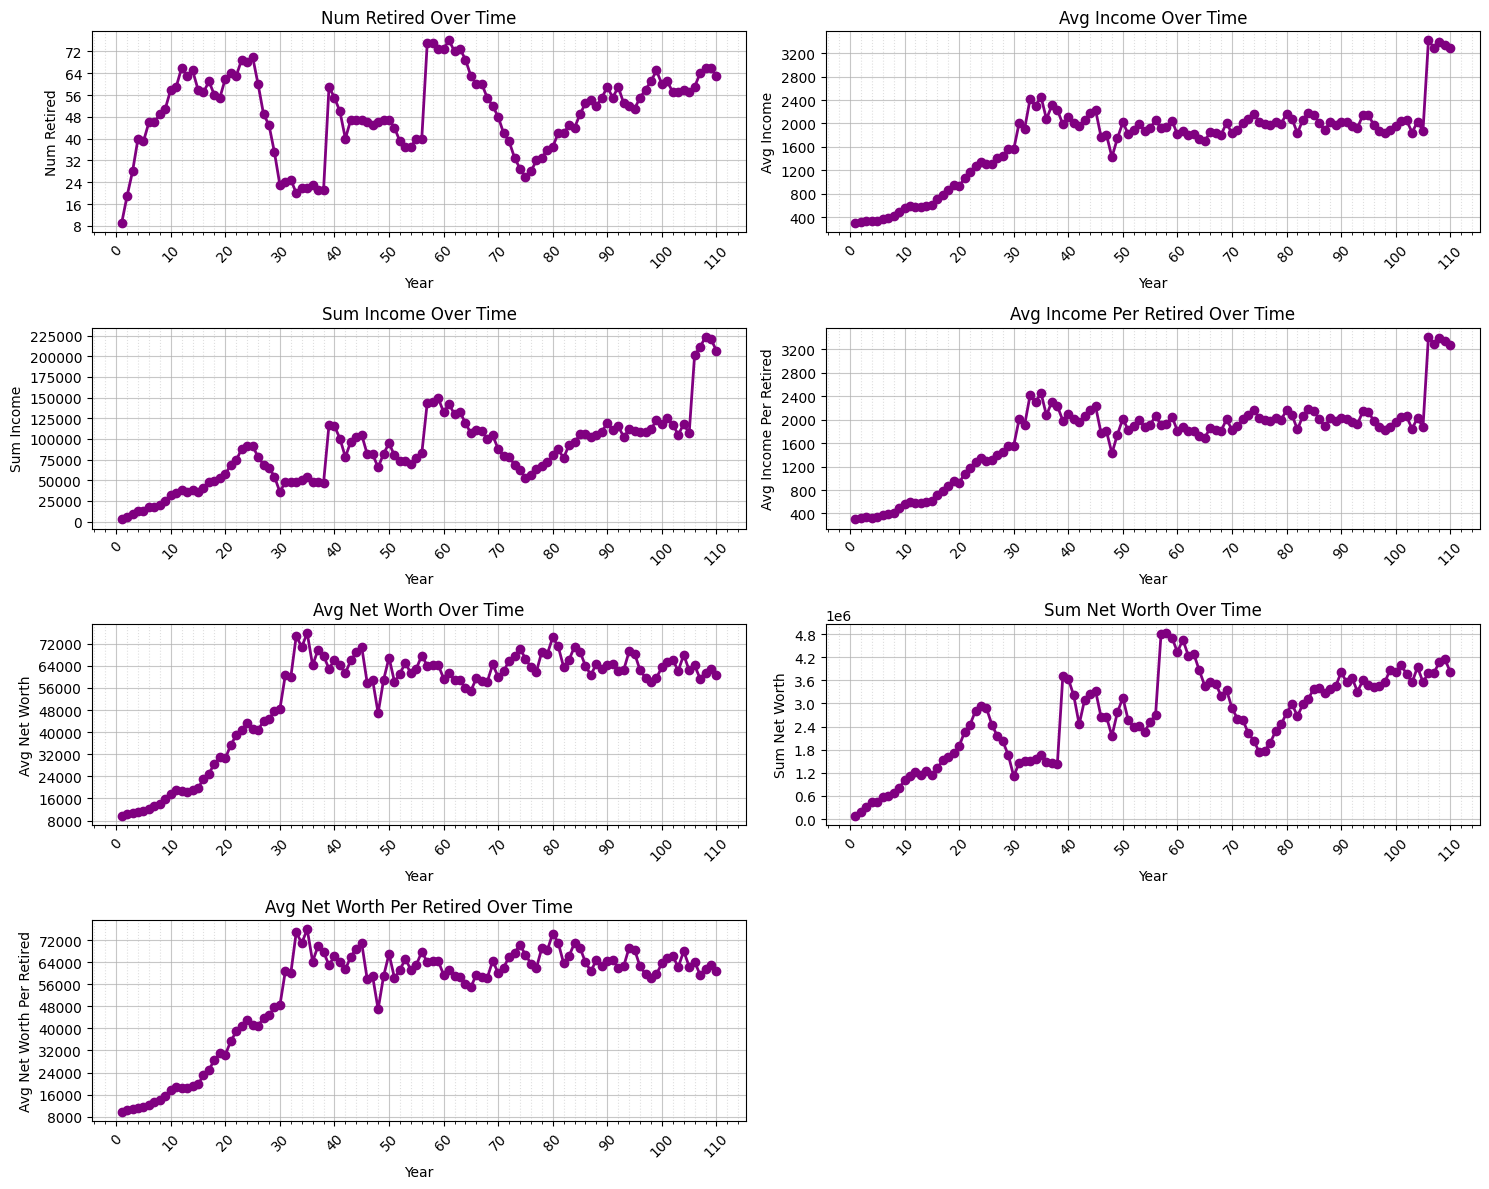

In [96]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in retired_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(retired_year_income['year'], retired_year_income[var], marker='o', linewidth=2, color='purple')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

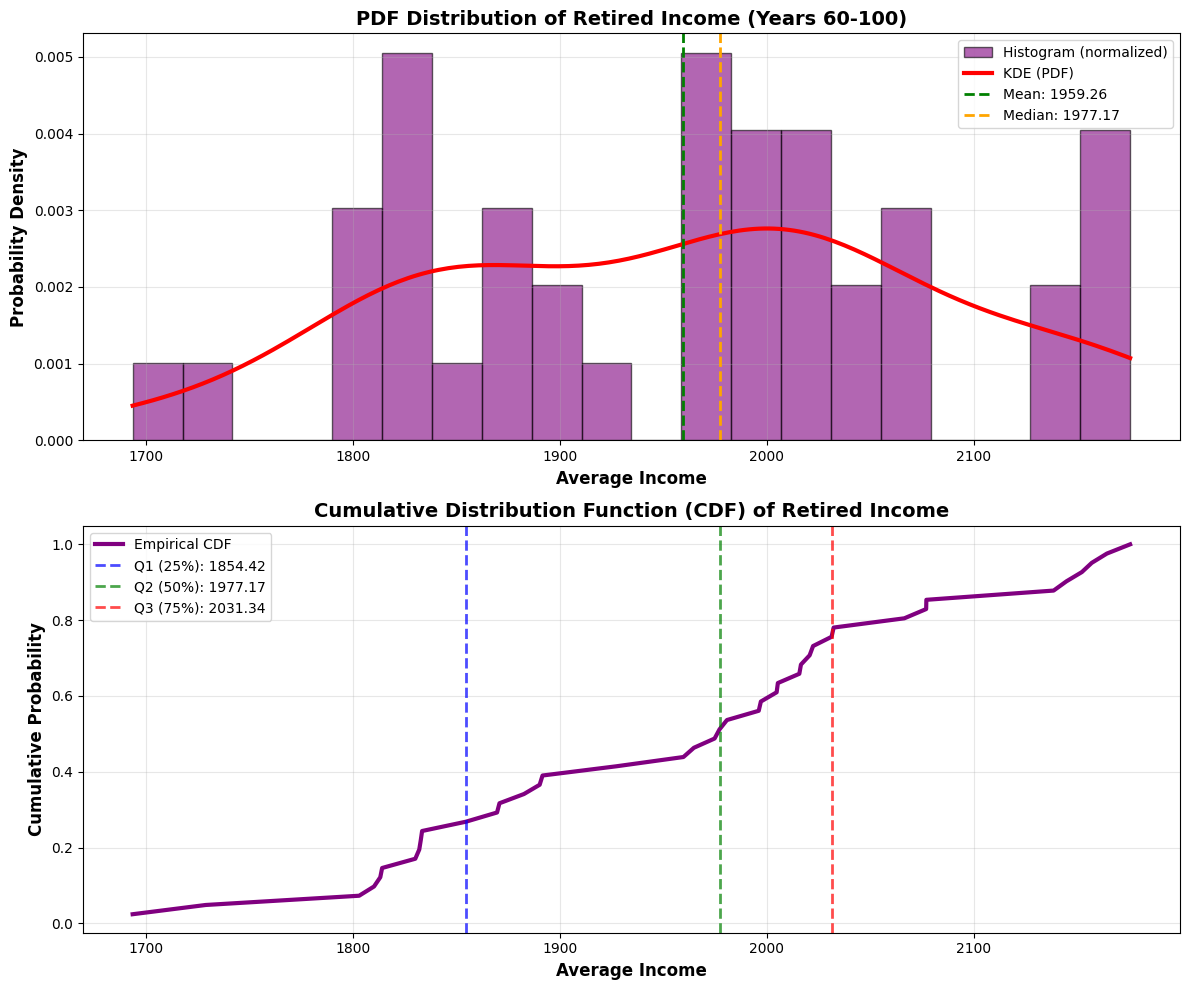

RETIRED INCOME STATISTICS (YEARS 60-100)

Number of observations: 41
Mean: 1959.26
Median: 1977.17
Standard Deviation: 123.50
Min: 1693.31
Max: 2175.73

Quartiles:
  Q1 (25%): 1854.42
  Q2 (50%): 1977.17
  Q3 (75%): 2031.34
  IQR (Q3-Q1): 176.92


In [97]:
# PDF Distribution of Retired Average Income (Years 60-100)
from scipy.stats import gaussian_kde

# Filter data for years 60-100
retired_subset = retired_year_income[(retired_year_income['year'] >= 60) & 
                                     (retired_year_income['year'] <= 100)]

# Get the income values
income_values = retired_subset['avg_income'].values

# Create figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot 1: Histogram with KDE (Probability Density Function)
ax1 = axes[0]

# Create histogram
counts, bins, patches = ax1.hist(income_values, bins=20, density=True, 
                                 alpha=0.6, color='purple', edgecolor='black',
                                 label='Histogram (normalized)')

# Calculate and plot KDE (smooth PDF)
kde = gaussian_kde(income_values)
x_range = np.linspace(income_values.min(), income_values.max(), 200)
kde_values = kde(x_range)

ax1.plot(x_range, kde_values, 'r-', linewidth=3, label='KDE (PDF)')

# Add mean and median lines
mean_income = income_values.mean()
median_income = np.median(income_values)

ax1.axvline(mean_income, color='green', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_income:.2f}')
ax1.axvline(median_income, color='orange', linestyle='--', linewidth=2, 
            label=f'Median: {median_income:.2f}')

ax1.set_xlabel('Average Income', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probability Density', fontsize=12, fontweight='bold')
ax1.set_title('PDF Distribution of Retired Income (Years 60-100)', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative Distribution Function (CDF)
ax2 = axes[1]

# Sort values for CDF
sorted_income = np.sort(income_values)
cdf = np.arange(1, len(sorted_income) + 1) / len(sorted_income)

ax2.plot(sorted_income, cdf, linewidth=3, color='purple', label='Empirical CDF')

# Add quartiles
q25 = np.percentile(income_values, 25)
q50 = np.percentile(income_values, 50)
q75 = np.percentile(income_values, 75)

ax2.axvline(q25, color='blue', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Q1 (25%): {q25:.2f}')
ax2.axvline(q50, color='green', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Q2 (50%): {q50:.2f}')
ax2.axvline(q75, color='red', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Q3 (75%): {q75:.2f}')

ax2.set_xlabel('Average Income', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Probability', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Distribution Function (CDF) of Retired Income', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("="*70)
print("RETIRED INCOME STATISTICS (YEARS 60-100)")
print("="*70)
print(f"\nNumber of observations: {len(income_values)}")
print(f"Mean: {mean_income:.2f}")
print(f"Median: {median_income:.2f}")
print(f"Standard Deviation: {income_values.std():.2f}")
print(f"Min: {income_values.min():.2f}")
print(f"Max: {income_values.max():.2f}")
print(f"\nQuartiles:")
print(f"  Q1 (25%): {q25:.2f}")
print(f"  Q2 (50%): {q50:.2f}")
print(f"  Q3 (75%): {q75:.2f}")
print(f"  IQR (Q3-Q1): {q75-q25:.2f}")

RETIRED INCOME - LAST 5 YEARS ANALYSIS

📊 Average Income of Retired People (Years 106-110):
   Overall Average: 3344.06

📋 Year-by-Year Breakdown:
 year  num_retired  avg_income
  106           59     3416.39
  107           64     3294.72
  108           66     3387.28
  109           66     3340.34
  110           63     3281.56

📈 Statistics for Last 5 Years:
   Minimum: 3281.56 (Year 110)
   Maximum: 3416.39 (Year 106)
   Standard Deviation: 58.00
   Range: 134.83

📊 Comparison to Overall Average:
   Overall Average (All Years): 1725.72
   Last 5 Years Average: 3344.06
   Difference: +1618.34 (+93.78%)


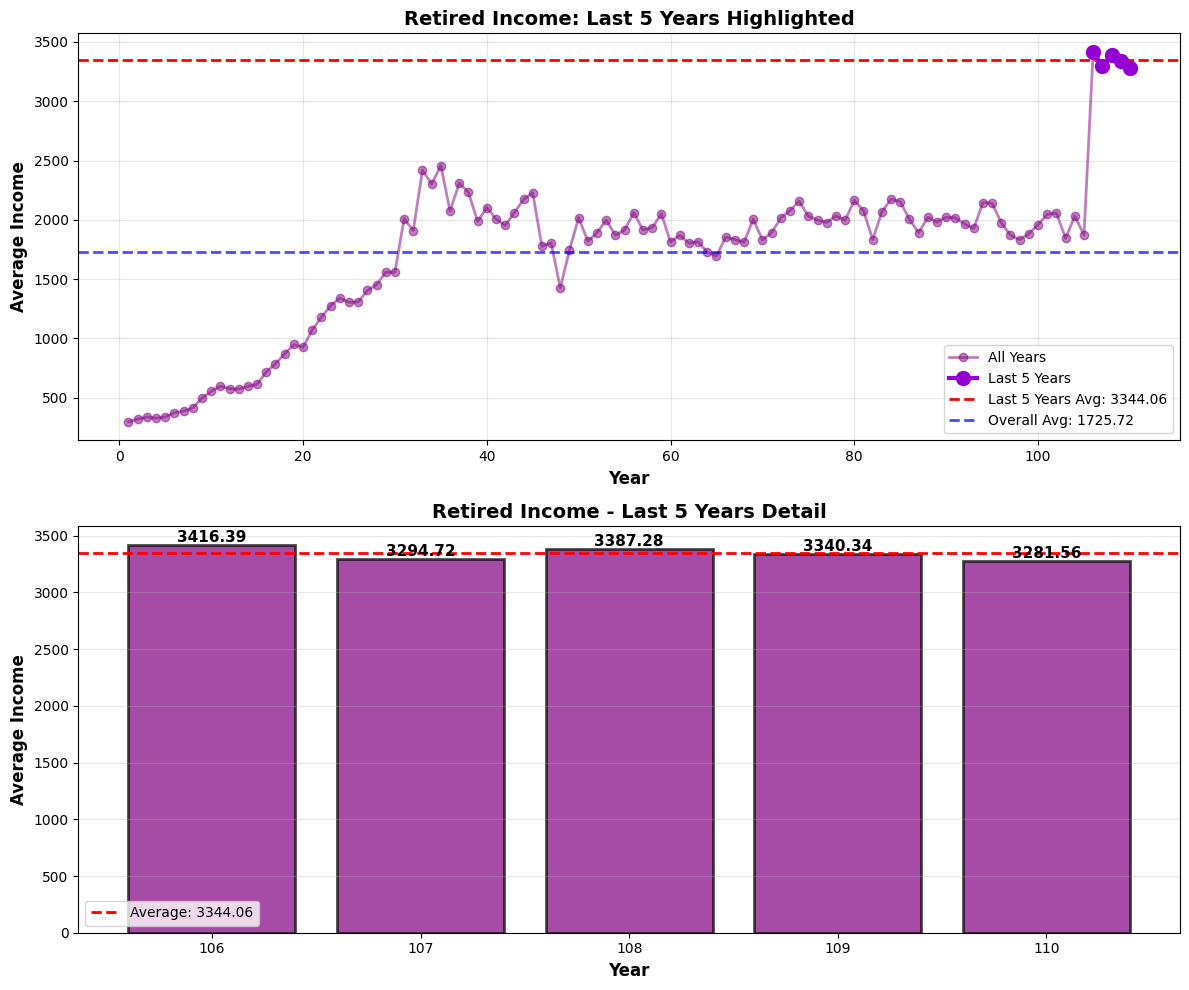

In [98]:
# Calculate average income of retired people in the last 5 years (106-110)
print("="*70)
print("RETIRED INCOME - LAST 5 YEARS ANALYSIS")
print("="*70)

# Filter for last 5 years (106-110)
last_5_years = retired_year_income[retired_year_income['year'] >= 106]

# Calculate overall average for last 5 years
avg_income_last_5 = last_5_years['avg_income'].mean()

print(f"\n📊 Average Income of Retired People (Years 106-110):")
print(f"   Overall Average: {avg_income_last_5:.2f}")
print(f"\n📋 Year-by-Year Breakdown:")
print(last_5_years[['year', 'num_retired', 'avg_income']].to_string(index=False))

# Additional statistics
print(f"\n📈 Statistics for Last 5 Years:")
print(f"   Minimum: {last_5_years['avg_income'].min():.2f} (Year {last_5_years.loc[last_5_years['avg_income'].idxmin(), 'year']:.0f})")
print(f"   Maximum: {last_5_years['avg_income'].max():.2f} (Year {last_5_years.loc[last_5_years['avg_income'].idxmax(), 'year']:.0f})")
print(f"   Standard Deviation: {last_5_years['avg_income'].std():.2f}")
print(f"   Range: {last_5_years['avg_income'].max() - last_5_years['avg_income'].min():.2f}")

# Compare to overall average (all years)
overall_avg = retired_year_income['avg_income'].mean()
difference = avg_income_last_5 - overall_avg
pct_change = (difference / overall_avg) * 100

print(f"\n📊 Comparison to Overall Average:")
print(f"   Overall Average (All Years): {overall_avg:.2f}")
print(f"   Last 5 Years Average: {avg_income_last_5:.2f}")
print(f"   Difference: {difference:+.2f} ({pct_change:+.2f}%)")

# Visualize
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot 1: All years with last 5 highlighted
ax1 = axes[0]
ax1.plot(retired_year_income['year'], retired_year_income['avg_income'], 
         marker='o', linewidth=2, color='purple', alpha=0.5, label='All Years')
ax1.plot(last_5_years['year'], last_5_years['avg_income'], 
         marker='o', linewidth=3, color='darkviolet', markersize=10,
         label='Last 5 Years', zorder=5)
ax1.axhline(y=avg_income_last_5, color='red', linestyle='--', linewidth=2,
            label=f'Last 5 Years Avg: {avg_income_last_5:.2f}')
ax1.axhline(y=overall_avg, color='blue', linestyle='--', linewidth=2,
            label=f'Overall Avg: {overall_avg:.2f}', alpha=0.7)

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Income', fontsize=12, fontweight='bold')
ax1.set_title('Retired Income: Last 5 Years Highlighted', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Bar chart of last 5 years
ax2 = axes[1]
bars = ax2.bar(last_5_years['year'], last_5_years['avg_income'], 
               color='purple', alpha=0.7, edgecolor='black', linewidth=2)
ax2.axhline(y=avg_income_last_5, color='red', linestyle='--', linewidth=2,
            label=f'Average: {avg_income_last_5:.2f}')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Income', fontsize=12, fontweight='bold')
ax2.set_title('Retired Income - Last 5 Years Detail', fontsize=14, fontweight='bold')
ax2.set_xticks(last_5_years['year'])
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Craftsman
Assume avg income of 4561.46 for the next 5 years 

In [99]:
# Filter for craftsman
craftsman_pd = all_profession[all_profession['profession'] == 'craftsman']
craftsman_pd = craftsman_pd.reset_index(drop=True)

# Create summary statistics by year
craftsman_year_income = np.round(craftsman_pd.groupby('year')['income'].mean().reset_index(), 2)
craftsman_year_income = craftsman_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
craftsman_year_income['sum_income'] = np.round(craftsman_pd.groupby('year')['income'].sum().values, 2)
craftsman_year_income['num_craftsman'] = np.round(craftsman_pd.groupby('year')['income'].count().values, 2)
craftsman_year_income['avg_income_per_craftsman'] = np.round(craftsman_year_income['sum_income'] / craftsman_year_income['num_craftsman'], 2)
craftsman_year_income['avg_net_worth'] = np.round(craftsman_pd.groupby('year')['net_worth'].mean().values, 2)
craftsman_year_income['sum_net_worth'] = np.round(craftsman_pd.groupby('year')['net_worth'].sum().values, 2)
craftsman_year_income['avg_net_worth_per_craftsman'] = np.round(craftsman_year_income['sum_net_worth'] / craftsman_year_income['num_craftsman'], 2)

# Reorder the columns 
order_columns = ['year', 'num_craftsman', 'avg_income', 'sum_income', 'avg_income_per_craftsman', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_craftsman']
craftsman_year_income = craftsman_year_income[order_columns]

# Display first 15 rows
craftsman_year_income.tail(20)

year  num_craftsman  avg_income  sum_income  avg_income_per_craftsman  \
91     91             52     5371.74   279330.35                   5371.74   
92     92             51     5461.18   278520.25                   5461.18   
93     93             51     5272.07   268875.75                   5272.07   
94     94             50     5385.80   269290.22                   5385.80   
95     95             51     5425.16   276683.10                   5425.16   
96     96             50     5526.89   276344.52                   5526.89   
97     97             49     5628.78   275810.35                   5628.78   
98     98             48     5748.32   275919.19                   5748.32   
99     99             46     5766.68   265267.24                   5766.68   
100   100             43     5671.22   243862.47                   5671.22   
101   101             41     5701.54   233763.29                   5701.54   
102   102             39     5708.75   222641.22                   5708.75   
103   103             35     5258.85   184059.62                   5258.85   
104   104             34     5202.14   176872.83                   5202.14   
105   105             35     5269.09   184418.27                   5269.09   
106   106             36     4591.39   165290.03                   4591.39   
107   107             36     4579.95   164878.31                   4579.95   
108   108             34     4561.46   155089.51                   4561.46   
109   109             33     4244.98   140084.34                   4244.98   
110   110             34     4315.25   146718.59                   4315.25   

     avg_net_worth  sum_net_worth  avg_net_worth_per_craftsman  
91        51410.05     2673322.44                     51410.05  
92        52647.63     2685029.14                     52647.63  
93        48646.28     2480960.03                     48646.28  
94        50650.67     2532533.64                     50650.67  
95        52225.49     2663499.76                     52225.49  
96        53541.25     2677062.74                     53541.25  
97        54859.88     2688134.14                     54859.88  
98        56256.71     2700321.90                     56256.71  
99        56550.92     2601342.42                     56550.92  
100       55331.15     2379239.58                     55331.15  
101       55325.09     2268328.82                     55325.09  
102       55085.87     2148349.00                     55085.87  
103       52385.90     1833506.58                     52385.90  
104       52942.50     1800045.14                     52942.50  
105       54035.85     1891254.81                     54035.85  
106       52109.50     1875942.18                     52109.50  
107       51416.20     1850983.18                     51416.20  
108       50043.54     1701480.51                     50043.54  
109       47212.24     1558004.01                     47212.24  
110       48009.89     1632336.27                     48009.89

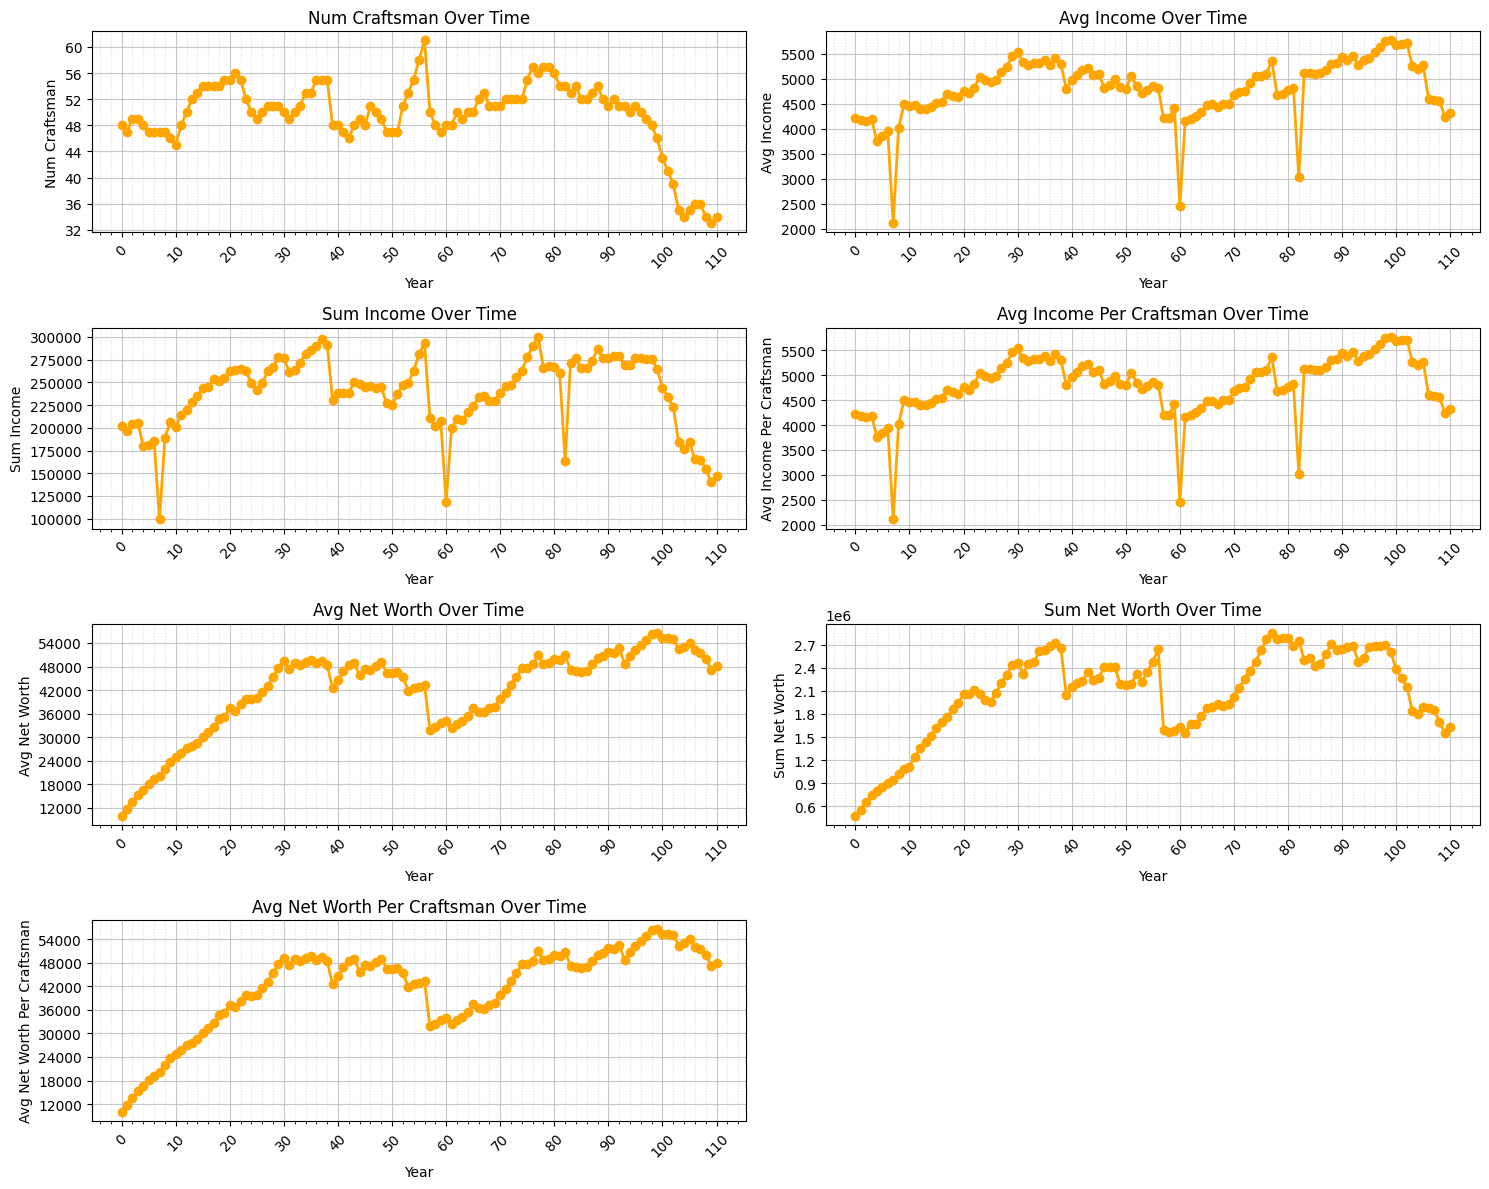

In [100]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in craftsman_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(craftsman_year_income['year'], craftsman_year_income[var], marker='o', linewidth=2, color='orange')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

## Civil Servant

assume stability for one year and then an increase of 2.43% for the following years

Year,Total Income

111,27,5189.5442490000005

112,27,5315.650174250701

113,27,5444.820473484992

114,27,5577.129610990678

115,27,5712.653860537752

In [18]:
# Civil Servant Income Projection - Year 112
year_111_total = 136793.61
growth_rate = 1.0243  # 2.43% increase

# Calculate year 112 total
year_111_total = 136793.58 * growth_rate
year_112_total = year_111_total * growth_rate
year_113_total = year_112_total * growth_rate
year_114_total = year_113_total * growth_rate
year_115_total = year_114_total * growth_rate

#nice table with all the years and the total for that year
print("Year\tTotal Income")
print(f"111\t{year_111_total}")
print(f"112\t{year_112_total}")
print(f"113\t{year_113_total}")
print(f"114\t{year_114_total}")
print(f"115\t{year_115_total}")


Year	Total Income
111	140117.66399399997
112	143522.52322905418
113	147010.1205435202
114	150582.46647272774
115	154241.62040801503


In [ ]:
Civil Servant Income Projection 
Year,Total Income
111,140117.66399399997
112,143522.52322905418
113,147010.1205435202
114,150582.46647272774
115,154241.62040801503

SyntaxError: invalid syntax (4047769398.py, line 1)

In [12]:
# Filter for civil servant
civil_pd = all_profession[all_profession['profession'] == 'civil servant']
civil_pd = civil_pd.reset_index(drop=True)

# Create summary statistics by year
civil_year_income = np.round(civil_pd.groupby('year')['income'].mean().reset_index(), 2)
civil_year_income = civil_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
civil_year_income['sum_income'] = np.round(civil_pd.groupby('year')['income'].sum().values, 2)
civil_year_income['num_civil'] = np.round(civil_pd.groupby('year')['income'].count().values, 2)
civil_year_income['avg_income_per_civil'] = np.round(civil_year_income['sum_income'] / civil_year_income['num_civil'], 2)
civil_year_income['avg_net_worth'] = np.round(civil_pd.groupby('year')['net_worth'].mean().values, 2)
civil_year_income['sum_net_worth'] = np.round(civil_pd.groupby('year')['net_worth'].sum().values, 2)
civil_year_income['avg_net_worth_per_civil'] = np.round(civil_year_income['sum_net_worth'] / civil_year_income['num_civil'], 2)

# Reorder the columns 
order_columns = ['year', 'num_civil', 'avg_income', 'sum_income', 'avg_income_per_civil', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_civil']
civil_year_income = civil_year_income[order_columns]

# Display first 15 rows
civil_year_income.tail(15)

year  num_civil  avg_income  sum_income  avg_income_per_civil  \
96     96         26     6279.83   163275.69               6279.83   
97     97         26     6606.43   171767.12               6606.43   
98     98         26     6368.39   165578.09               6368.39   
99     99         26     6539.95   170038.66               6539.95   
100   100         25     6548.40   163709.98               6548.40   
101   101         26     6533.42   169869.05               6533.42   
102   102         26     6386.87   166058.62               6386.87   
103   103         26     6042.53   157105.70               6042.53   
104   104         26     6186.89   160859.26               6186.89   
105   105         26     6440.80   167460.68               6440.80   
106   106         25     5786.76   144668.99               5786.76   
107   107         26     5769.47   150006.24               5769.47   
108   108         26     5759.08   149735.96               5759.08   
109   109         27     5210.16   140674.43               5210.16   
110   110         27     5066.43   136793.58               5066.43   

     avg_net_worth  sum_net_worth  avg_net_worth_per_civil  
96        58473.76     1520317.83                 58473.76  
97        61399.87     1596396.61                 61399.87  
98        59202.81     1539273.10                 59202.81  
99        62143.10     1615720.56                 62143.10  
100       61891.06     1547276.56                 61891.06  
101       62845.07     1633971.89                 62845.07  
102       60700.06     1578201.51                 60700.06  
103       58485.92     1520633.98                 58485.92  
104       61299.36     1593783.43                 61299.36  
105       64205.49     1669342.79                 64205.49  
106       65199.65     1629991.21                 65199.65  
107       65708.58     1708423.21                 65708.58  
108       63350.84     1647121.97                 63350.84  
109       58993.81     1592832.98                 58993.81  
110       56566.73     1527301.79                 56566.73

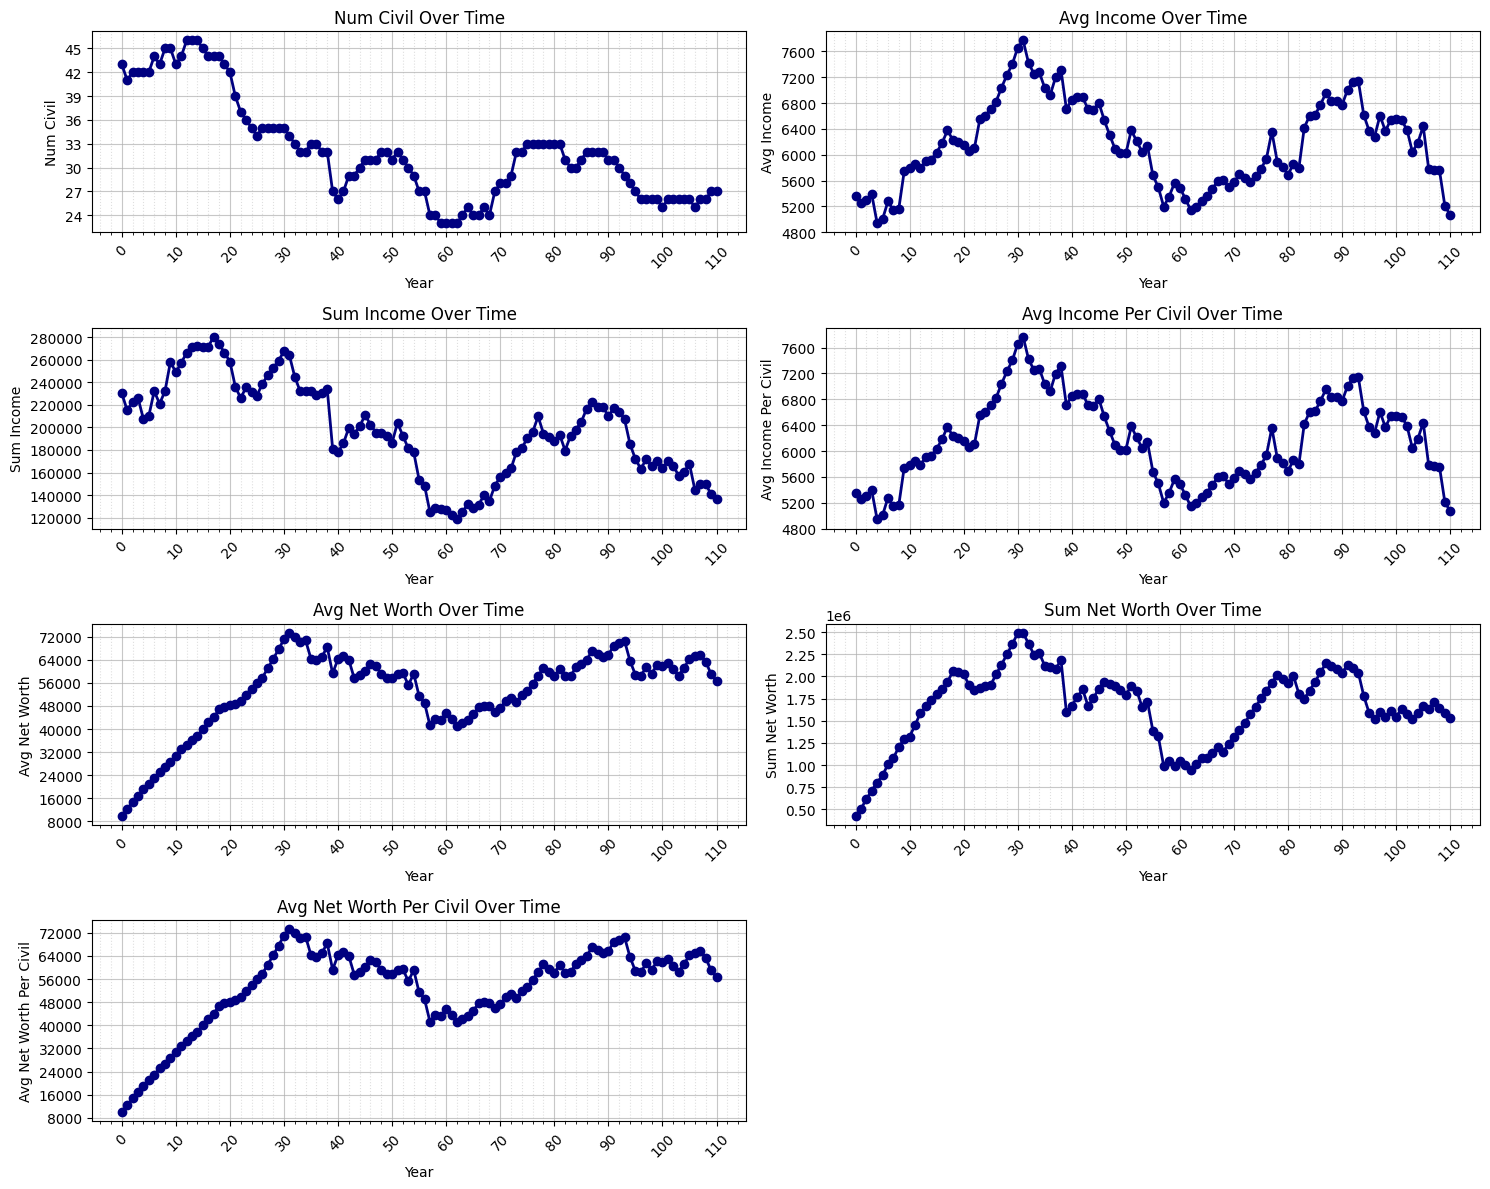

In [7]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in civil_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(civil_year_income['year'], civil_year_income[var], marker='o', linewidth=2, color='navy')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

CIVIL SERVANT INCOME - RATE OF CHANGE (LAST 5 YEARS)

📊 Year-over-Year Income Growth (Last 5 Years):
 year  avg_income  income_growth
  106     5786.76     -10.154639
  107     5769.47      -0.298786
  108     5759.08      -0.180086
  109     5210.16      -9.531383
  110     5066.43      -2.758648

📈 Average Annual Growth Rate (Years 106-110): -4.58%

📊 Recent Trends:
 year  avg_income  income_growth  avg_income_growth_3_years
  101     6533.42      -0.228758                   0.864793
  102     6386.87      -2.243082                  -0.780878
  103     6042.53      -5.391373                  -2.621071
  104     6186.89       2.389066                  -1.748463
  105     6440.80       4.104001                   0.367231
  106     5786.76     -10.154639                  -1.220524
  107     5769.47      -0.298786                  -2.116475
  108     5759.08      -0.180086                  -3.544504
  109     5210.16      -9.531383                  -3.336752
  110     5066.43      -2.758

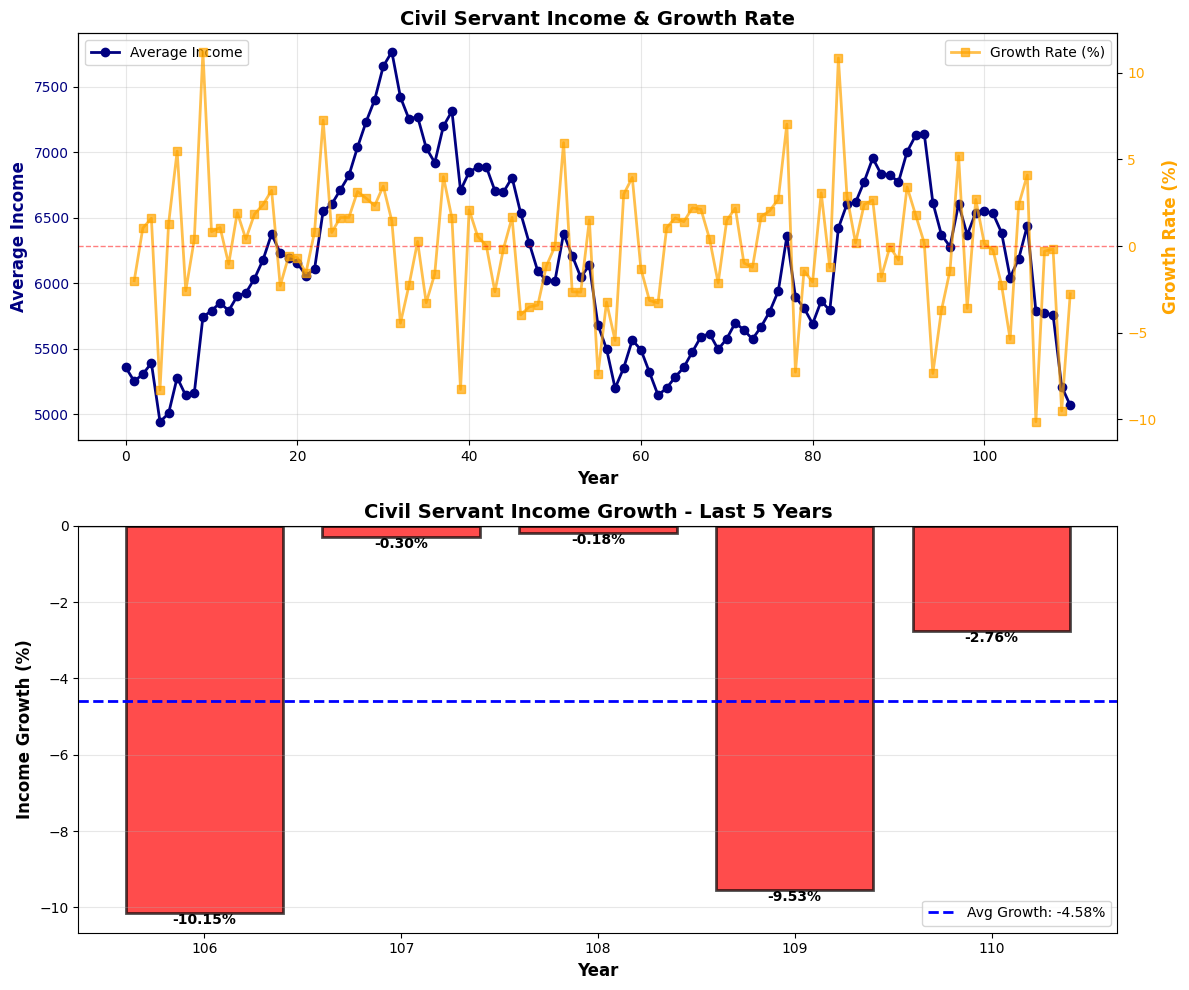


📊 Summary Statistics (Last 5 Years):
   Highest Growth: -0.18% (Year 108)
   Lowest Growth: -10.15% (Year 106)
   Standard Deviation: 4.91%


In [8]:
# rate of change of income in the last 5 years for civil servants
# rate of change of income in the last 5 years for civil servants
# Rate of change of income in the last 5 years for civil servants
print("="*70)
print("CIVIL SERVANT INCOME - RATE OF CHANGE (LAST 5 YEARS)")
print("="*70)

# Calculate year-over-year percentage change
civil_year_income['income_growth'] = civil_year_income['avg_income'].pct_change() * 100

# Filter for last 5 years (106-110)
last_5_years_civil = civil_year_income[civil_year_income['year'] >= 106].copy()

print(f"\n📊 Year-over-Year Income Growth (Last 5 Years):")
print(last_5_years_civil[['year', 'avg_income', 'income_growth']].to_string(index=False))

# Calculate average growth rate for last 5 years
avg_growth_last_5 = last_5_years_civil['income_growth'].mean()
print(f"\n📈 Average Annual Growth Rate (Years 106-110): {avg_growth_last_5:.2f}%")

# Calculate 3-year rolling average
civil_year_income['avg_income_growth_3_years'] = civil_year_income['income_growth'].rolling(window=3).mean()

# Show recent trend
print(f"\n📊 Recent Trends:")
print(civil_year_income[['year', 'avg_income', 'income_growth', 'avg_income_growth_3_years']].tail(10).to_string(index=False))

# Visualize
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot 1: Income over time with growth rate
ax1 = axes[0]
ax1_twin = ax1.twinx()

# Income on left axis
ax1.plot(civil_year_income['year'], civil_year_income['avg_income'], 
         marker='o', linewidth=2, color='navy', label='Average Income')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Income', fontsize=12, fontweight='bold', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

# Growth rate on right axis
ax1_twin.plot(civil_year_income['year'], civil_year_income['income_growth'], 
              marker='s', linewidth=2, color='orange', alpha=0.7, label='Growth Rate (%)')
ax1_twin.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax1_twin.set_ylabel('Growth Rate (%)', fontsize=12, fontweight='bold', color='orange')
ax1_twin.tick_params(axis='y', labelcolor='orange')

ax1.set_title('Civil Servant Income & Growth Rate', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Plot 2: Focus on last 5 years
ax2 = axes[1]
bars = ax2.bar(last_5_years_civil['year'], last_5_years_civil['income_growth'], 
               color=['green' if x > 0 else 'red' for x in last_5_years_civil['income_growth']],
               alpha=0.7, edgecolor='black', linewidth=2)
ax2.axhline(y=avg_growth_last_5, color='blue', linestyle='--', linewidth=2,
            label=f'Avg Growth: {avg_growth_last_5:.2f}%')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom' if height > 0 else 'top', 
            fontweight='bold', fontsize=10)

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Income Growth (%)', fontsize=12, fontweight='bold')
ax2.set_title('Civil Servant Income Growth - Last 5 Years', fontsize=14, fontweight='bold')
ax2.set_xticks(last_5_years_civil['year'])
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Additional statistics
print(f"\n📊 Summary Statistics (Last 5 Years):")
print(f"   Highest Growth: {last_5_years_civil['income_growth'].max():.2f}% (Year {last_5_years_civil.loc[last_5_years_civil['income_growth'].idxmax(), 'year']:.0f})")
print(f"   Lowest Growth: {last_5_years_civil['income_growth'].min():.2f}% (Year {last_5_years_civil.loc[last_5_years_civil['income_growth'].idxmin(), 'year']:.0f})")
print(f"   Standard Deviation: {last_5_years_civil['income_growth'].std():.2f}%")

## Homemaker
* decrease of 2 per year
* avg_income: -180 ( assume it stays constant)


In [ ]:

Homemaker income projection

111, -8100
112, -7920
113, -7740
114, -7740
115, -7740


In [9]:
# Filter for homemaker
homemaker_pd = all_profession[all_profession['profession'] == 'homemaker']
homemaker_pd = homemaker_pd.reset_index(drop=True)

# Create summary statistics by year
homemaker_year_income = np.round(homemaker_pd.groupby('year')['income'].mean().reset_index(), 2)
homemaker_year_income = homemaker_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
homemaker_year_income['sum_income'] = np.round(homemaker_pd.groupby('year')['income'].sum().values, 2)
homemaker_year_income['num_homemaker'] = np.round(homemaker_pd.groupby('year')['income'].count().values, 2)
homemaker_year_income['avg_income_per_homemaker'] = np.round(homemaker_year_income['sum_income'] / homemaker_year_income['num_homemaker'], 2)
homemaker_year_income['avg_net_worth'] = np.round(homemaker_pd.groupby('year')['net_worth'].mean().values, 2)
homemaker_year_income['sum_net_worth'] = np.round(homemaker_pd.groupby('year')['net_worth'].sum().values, 2)
homemaker_year_income['avg_net_worth_per_homemaker'] = np.round(homemaker_year_income['sum_net_worth'] / homemaker_year_income['num_homemaker'], 2)

# Reorder the columns 
order_columns = ['year', 'num_homemaker', 'avg_income', 'sum_income', 'avg_income_per_homemaker', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_homemaker']
homemaker_year_income = homemaker_year_income[order_columns]

# Display first 15 rows
homemaker_year_income.tail(15)

year  num_homemaker  avg_income  sum_income  avg_income_per_homemaker  \
96     96             51     -234.28   -11948.15                   -234.28   
97     97             51     -222.78   -11361.83                   -222.78   
98     98             51     -230.95   -11778.63                   -230.95   
99     99             52     -233.39   -12136.15                   -233.39   
100   100             54     -227.54   -12287.28                   -227.54   
101   101             55     -229.52   -12623.57                   -229.52   
102   102             55     -234.01   -12870.80                   -234.01   
103   103             57     -236.11   -13458.12                   -236.11   
104   104             59     -245.95   -14511.33                   -245.95   
105   105             55     -253.58   -13946.78                   -253.58   
106   106             54     -251.36   -13573.42                   -251.36   
107   107             52     -233.90   -12162.62                   -233.90   
108   108             50     -231.91   -11595.62                   -231.91   
109   109             49     -220.00   -10779.84                   -220.00   
110   110             47     -177.06    -8321.86                   -177.06   

     avg_net_worth  sum_net_worth  avg_net_worth_per_homemaker  
96        -9675.29     -493439.59                     -9675.29  
97        -9228.92     -470674.90                     -9228.92  
98        -9414.61     -480145.02                     -9414.61  
99        -9224.78     -479688.33                     -9224.78  
100       -8778.18     -474021.47                     -8778.18  
101       -8625.92     -474425.58                     -8625.92  
102       -8801.06     -484058.36                     -8801.06  
103       -8877.86     -506038.26                     -8877.86  
104       -9043.91     -533590.56                     -9043.91  
105       -9463.66     -520501.49                     -9463.66  
106       -9237.67     -498834.30                     -9237.67  
107       -8532.40     -443684.54                     -8532.40  
108       -8583.08     -429153.94                     -8583.08  
109       -8147.89     -399246.54                     -8147.89  
110       -6354.42     -298657.89                     -6354.42

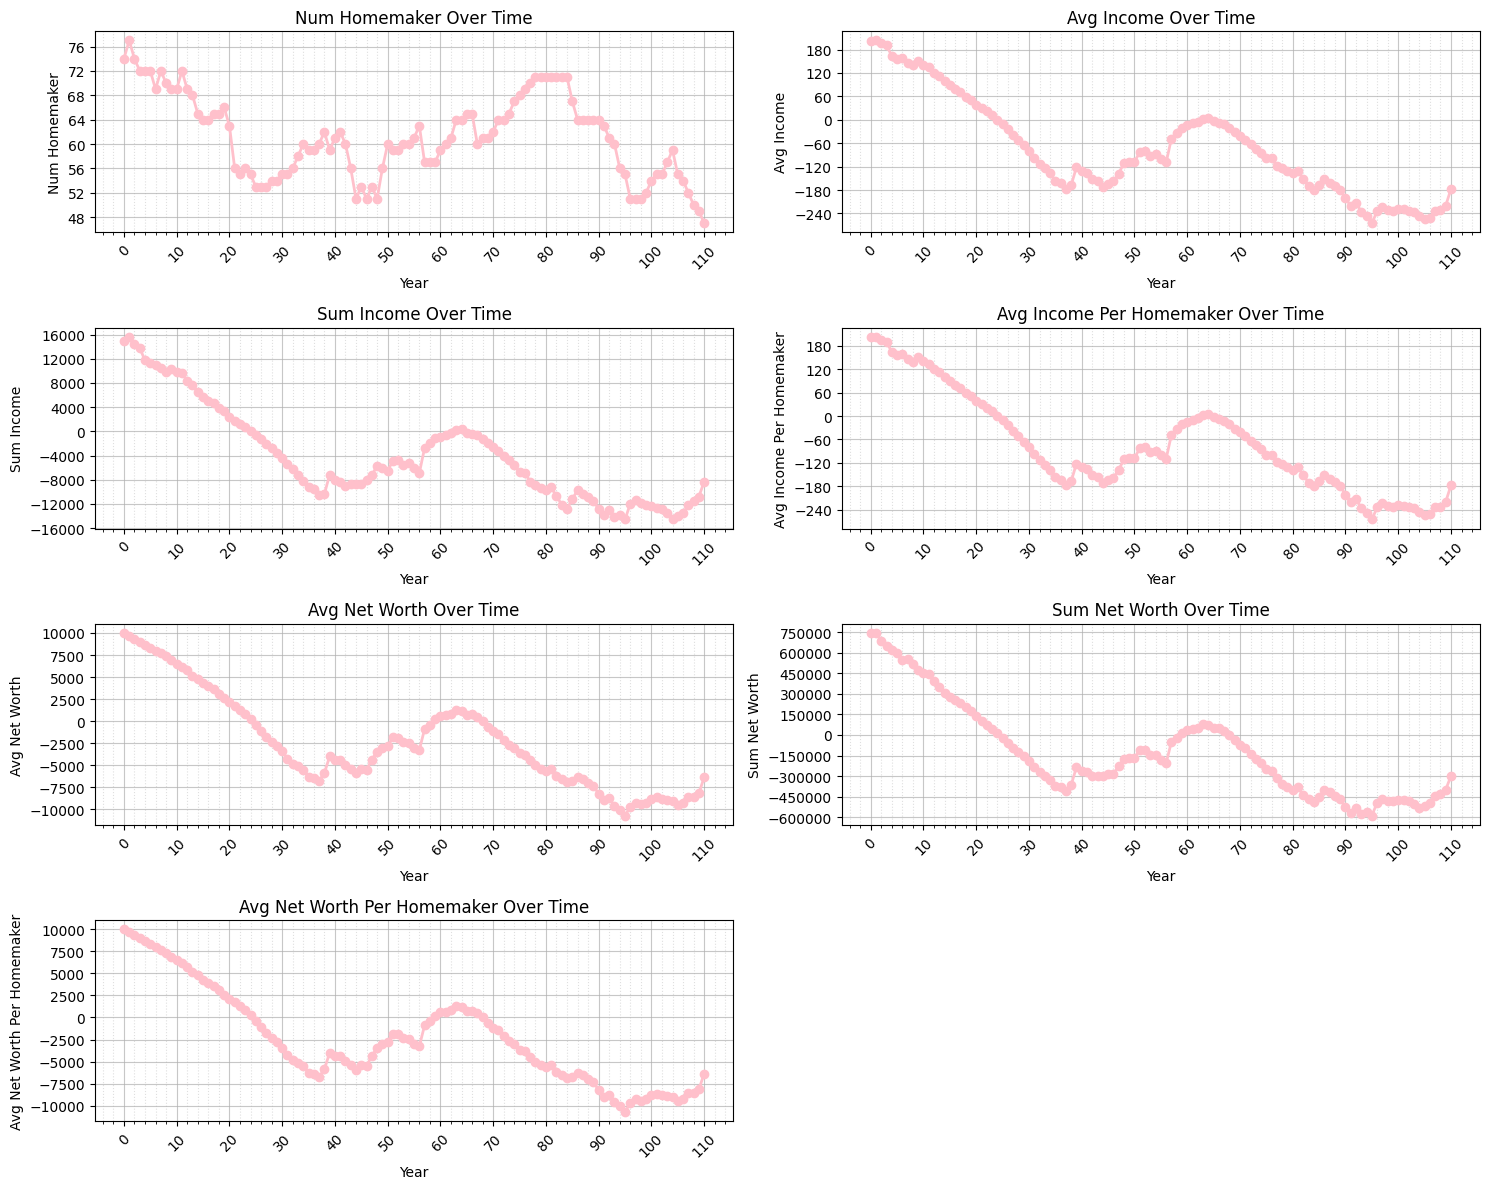

In [104]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in homemaker_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(homemaker_year_income['year'], homemaker_year_income[var], marker='o', linewidth=2, color='pink')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

## Child

avg income per child 0

In [105]:
# Filter for child
child_pd = all_profession[all_profession['profession'] == 'child']
child_pd = child_pd.reset_index(drop=True)

# Create summary statistics by year
child_year_income = np.round(child_pd.groupby('year')['income'].mean().reset_index(), 2)
child_year_income = child_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
child_year_income['sum_income'] = np.round(child_pd.groupby('year')['income'].sum().values, 2)
child_year_income['num_child'] = np.round(child_pd.groupby('year')['income'].count().values, 2)
child_year_income['avg_income_per_child'] = np.round(child_year_income['sum_income'] / child_year_income['num_child'], 2)
child_year_income['avg_net_worth'] = np.round(child_pd.groupby('year')['net_worth'].mean().values, 2)
child_year_income['sum_net_worth'] = np.round(child_pd.groupby('year')['net_worth'].sum().values, 2)
child_year_income['avg_net_worth_per_child'] = np.round(child_year_income['sum_net_worth'] / child_year_income['num_child'], 2)

# Reorder the columns 
order_columns = ['year', 'num_child', 'avg_income', 'sum_income', 'avg_income_per_child', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_child']
child_year_income = child_year_income[order_columns]

# Display first 15 rows
child_year_income.head(15)

year  num_child  avg_income  sum_income  avg_income_per_child  \
0      0        124         0.0         0.0                   0.0   
1      1        121         0.0         0.0                   0.0   
2      2        118         0.0         0.0                   0.0   
3      3        113         0.0         0.0                   0.0   
4      4        109         0.0         0.0                   0.0   
5      5        107         0.0         0.0                   0.0   
6      6        103         0.0         0.0                   0.0   
7      7         99         0.0         0.0                   0.0   
8      8         95         0.0         0.0                   0.0   
9      9         92         0.0         0.0                   0.0   
10    10         90         0.0         0.0                   0.0   
11    11         84         0.0         0.0                   0.0   
12    12         80         0.0         0.0                   0.0   
13    13         78         0.0         0.0                   0.0   
14    14         78         0.0         0.0                   0.0   

    avg_net_worth  sum_net_worth  avg_net_worth_per_child  
0         10000.0      1240000.0                  10000.0  
1         10000.0      1210000.0                  10000.0  
2         10000.0      1180000.0                  10000.0  
3         10000.0      1130000.0                  10000.0  
4         10000.0      1090000.0                  10000.0  
5         10000.0      1070000.0                  10000.0  
6         10000.0      1030000.0                  10000.0  
7         10000.0       990000.0                  10000.0  
8         10000.0       950000.0                  10000.0  
9         10000.0       920000.0                  10000.0  
10        10000.0       900000.0                  10000.0  
11        10000.0       840000.0                  10000.0  
12        10000.0       800000.0                  10000.0  
13        10000.0       780000.0                  10000.0  
14        10000.0       780000.0                  10000.0

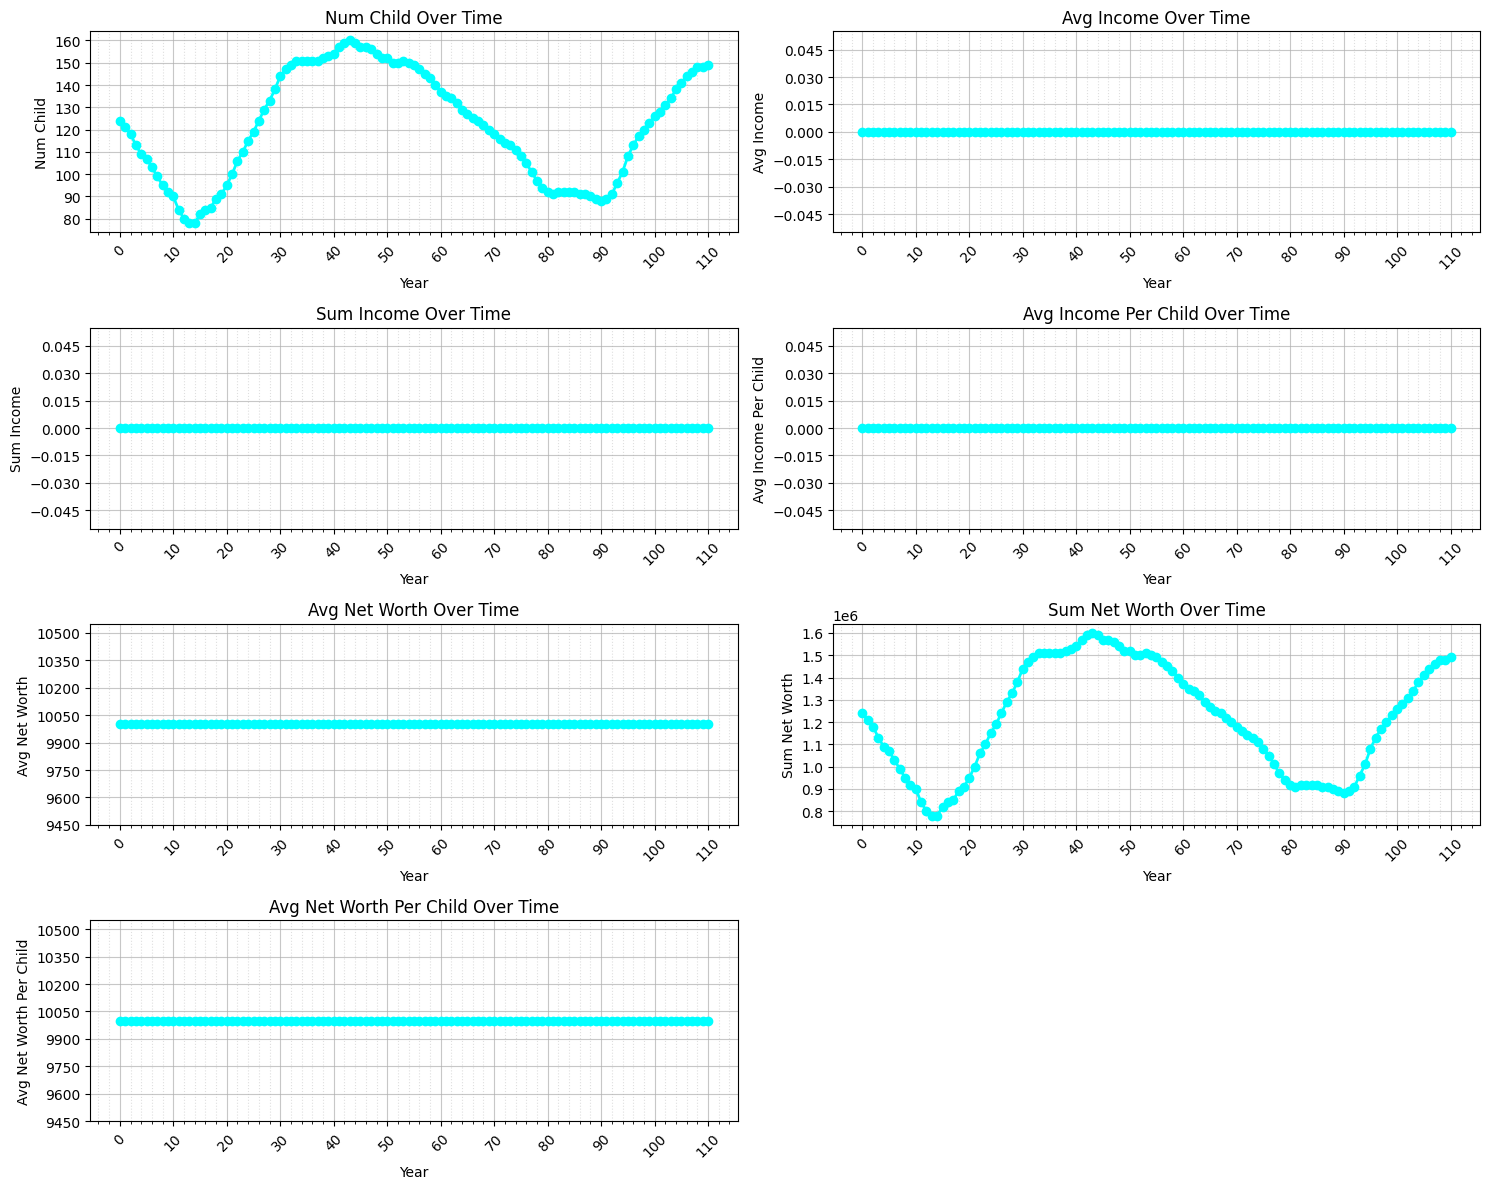

In [106]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in child_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(child_year_income['year'], child_year_income[var], marker='o', linewidth=2, color='cyan')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

## Unemployed
avg. income: -213.62
num unemployed: 30

In [107]:
# Filter for unemployed
unemployed_pd = all_profession[all_profession['profession'] == 'unemployed']
unemployed_pd = unemployed_pd.reset_index(drop=True)

# Create summary statistics by year
unemployed_year_income = np.round(unemployed_pd.groupby('year')['income'].mean().reset_index(), 2)
unemployed_year_income = unemployed_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
unemployed_year_income['sum_income'] = np.round(unemployed_pd.groupby('year')['income'].sum().values, 2)
unemployed_year_income['num_unemployed'] = np.round(unemployed_pd.groupby('year')['income'].count().values, 2)
unemployed_year_income['avg_income_per_unemployed'] = np.round(unemployed_year_income['sum_income'] / unemployed_year_income['num_unemployed'], 2)
unemployed_year_income['avg_net_worth'] = np.round(unemployed_pd.groupby('year')['net_worth'].mean().values, 2)
unemployed_year_income['sum_net_worth'] = np.round(unemployed_pd.groupby('year')['net_worth'].sum().values, 2)
unemployed_year_income['avg_net_worth_per_unemployed'] = np.round(unemployed_year_income['sum_net_worth'] / unemployed_year_income['num_unemployed'], 2)

# Reorder the columns 
order_columns = ['year', 'num_unemployed', 'avg_income', 'sum_income', 'avg_income_per_unemployed', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_unemployed']
unemployed_year_income = unemployed_year_income[order_columns]

# Display first 15 rows
unemployed_year_income.tail(15)

year  num_unemployed  avg_income  sum_income  avg_income_per_unemployed  \
96     96              27      -68.22    -1841.85                     -68.22   
97     97              27      -83.31    -2249.35                     -83.31   
98     98              27     -101.93    -2752.23                    -101.93   
99     99              27     -119.18    -3217.78                    -119.18   
100   100              27     -136.01    -3672.19                    -136.01   
101   101              29     -139.77    -4053.32                    -139.77   
102   102              29     -159.36    -4621.56                    -159.36   
103   103              29     -166.96    -4841.90                    -166.96   
104   104              28     -164.32    -4600.84                    -164.32   
105   105              29     -173.54    -5032.56                    -173.54   
106   106              29     -193.42    -5609.29                    -193.42   
107   107              29     -211.91    -6145.47                    -211.91   
108   108              29     -203.20    -5892.69                    -203.20   
109   109              30     -204.75    -6142.55                    -204.75   
110   110              31     -213.62    -6622.13                    -213.62   

     avg_net_worth  sum_net_worth  avg_net_worth_per_unemployed  
96        -3089.70      -83421.88                      -3089.70  
97        -3927.22     -106034.95                      -3927.22  
98        -4700.29     -126907.74                      -4700.29  
99        -5478.84     -147928.60                      -5478.84  
100       -6336.58     -171087.58                      -6336.58  
101       -5983.47     -173520.59                      -5983.47  
102       -6762.56     -196114.14                      -6762.56  
103       -7429.90     -215467.13                      -7429.90  
104       -7449.90     -208597.29                      -7449.90  
105       -7650.26     -221857.45                      -7650.26  
106       -8397.76     -243535.06                      -8397.76  
107       -9115.13     -264338.87                      -9115.13  
108       -8599.16     -249375.69                      -8599.16  
109       -8710.73     -261321.95                      -8710.73  
110       -8851.79     -274405.38                      -8851.79

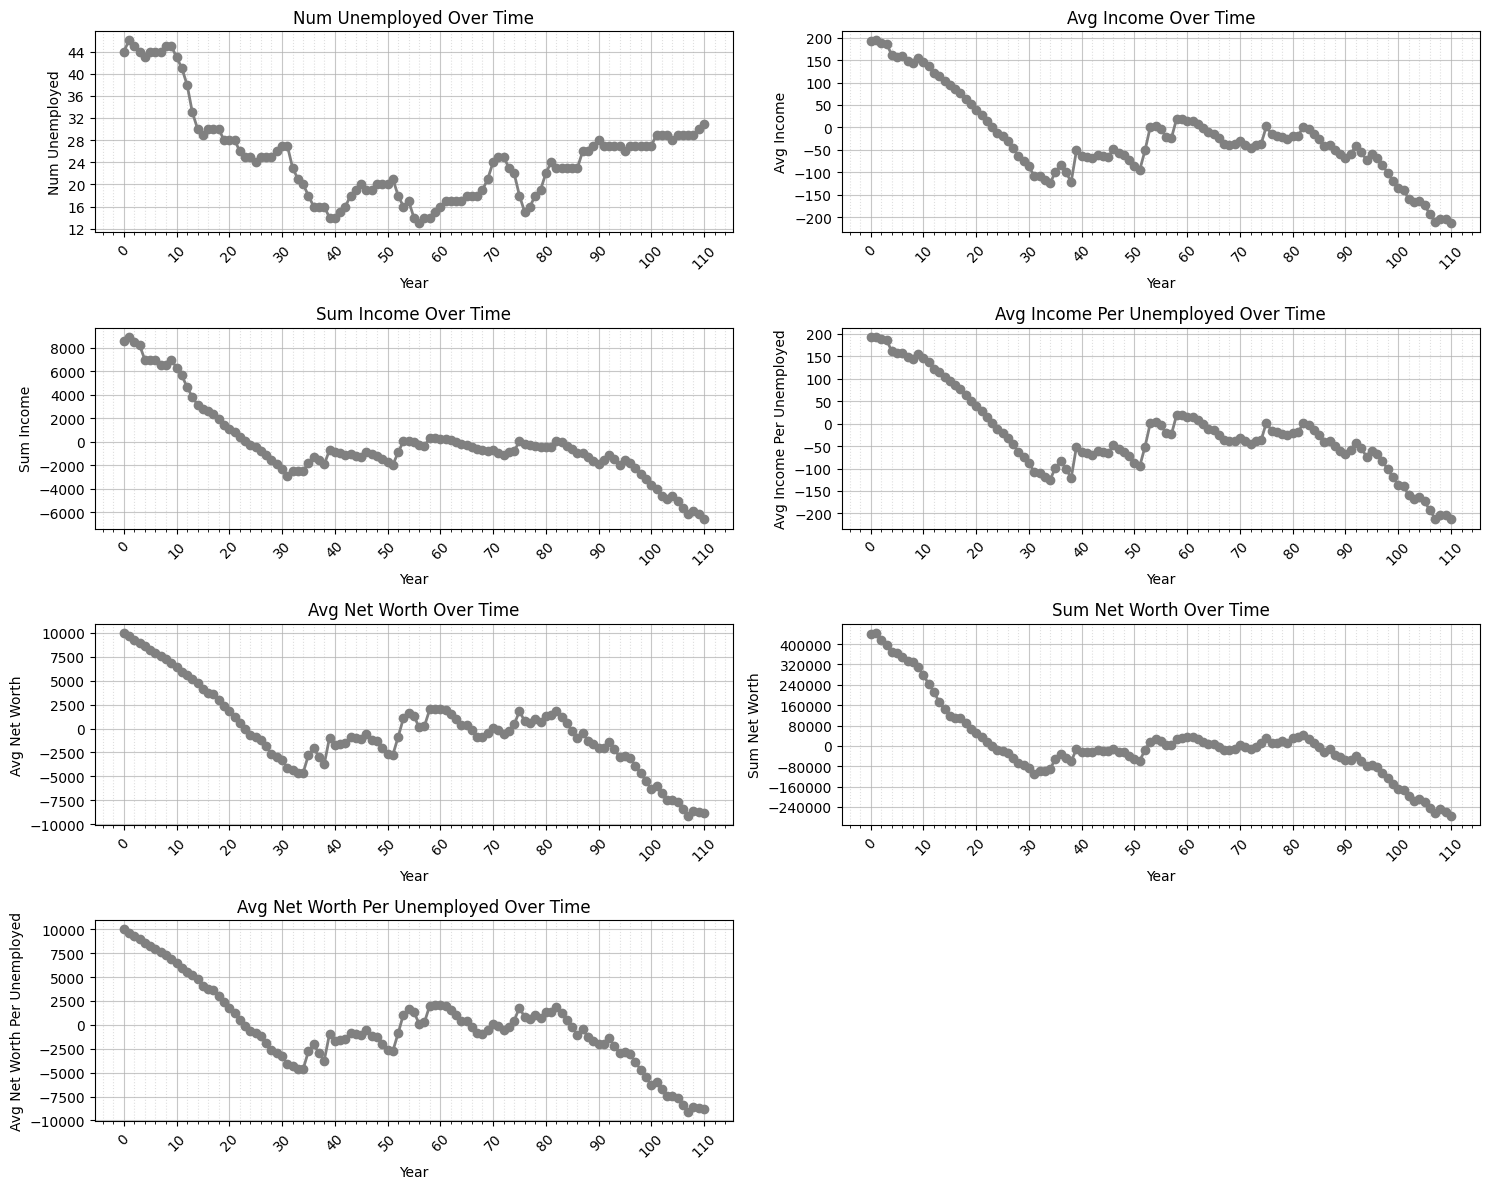

In [108]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in unemployed_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(unemployed_year_income['year'], unemployed_year_income[var], marker='o', linewidth=2, color='gray')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

## Service Provider

assume increase of 1.787933% per year for the next years 


In [17]:
year_111_total = 136793.61
growth_rate = 1.017879  # 2.43% increase

# Calculate year 112 total
year_111_total = 218825.03 * growth_rate
year_112_total = year_111_total * growth_rate
year_113_total = year_112_total * growth_rate
year_114_total = year_113_total * growth_rate
year_115_total = year_114_total * growth_rate

#nice table with all the years and the total for that year
print("Year\tTotal Income")
print(f"111\t{year_111_total}")
print(f"112\t{year_112_total}")
print(f"113\t{year_113_total}")
print(f"114\t{year_114_total}")
print(f"115\t{year_115_total}")

Year	Total Income
111	222737.40271137
112	226719.7247344466
113	230773.24669297374
114	234899.24157059743
115	239099.00511063813


In [ ]:
Service provider Income Projection
Year,Total Income
111,222737.40271137
112,226719.7247344466
113,230773.24669297374
114,234899.24157059743
115,239099.00511063813

In [109]:
# Filter for service provider
service_pd = all_profession[all_profession['profession'] == 'service provider']
service_pd = service_pd.reset_index(drop=True)

# Create summary statistics by year
service_year_income = np.round(service_pd.groupby('year')['income'].mean().reset_index(), 2)
service_year_income = service_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
service_year_income['sum_income'] = np.round(service_pd.groupby('year')['income'].sum().values, 2)
service_year_income['num_service'] = np.round(service_pd.groupby('year')['income'].count().values, 2)
service_year_income['avg_income_per_service'] = np.round(service_year_income['sum_income'] / service_year_income['num_service'], 2)
service_year_income['avg_net_worth'] = np.round(service_pd.groupby('year')['net_worth'].mean().values, 2)
service_year_income['sum_net_worth'] = np.round(service_pd.groupby('year')['net_worth'].sum().values, 2)
service_year_income['avg_net_worth_per_service'] = np.round(service_year_income['sum_net_worth'] / service_year_income['num_service'], 2)

# Reorder the columns 
order_columns = ['year', 'num_service', 'avg_income', 'sum_income', 'avg_income_per_service', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_service']
service_year_income = service_year_income[order_columns]

# Display first 15 rows
service_year_income.head(15)

year  num_service  avg_income  sum_income  avg_income_per_service  \
0      0           41     5215.76   213846.07                 5215.76   
1      1           40     5203.42   208136.70                 5203.42   
2      2           40     5131.33   205253.05                 5131.33   
3      3           41     5191.45   212849.53                 5191.45   
4      4           41     4849.11   198813.69                 4849.11   
5      5           41     5041.77   206712.37                 5041.77   
6      6           41     5254.53   215435.87                 5254.53   
7      7           42     5113.65   214773.27                 5113.65   
8      8           41     5074.33   208047.58                 5074.33   
9      9           42     5627.25   236344.47                 5627.25   
10    10           41     5538.30   227070.48                 5538.30   
11    11           39     5444.53   212336.62                 5444.53   
12    12           37     5270.62   195013.06                 5270.62   
13    13           40     5309.78   212391.19                 5309.78   
14    14           40     5470.63   218825.03                 5470.63   

    avg_net_worth  sum_net_worth  avg_net_worth_per_service  
0        10000.00      410000.00                   10000.00  
1        12327.79      493111.46                   12327.79  
2        14442.76      577710.55                   14442.76  
3        16688.18      684215.57                   16688.18  
4        18839.91      772436.39                   18839.91  
5        21104.89      865300.47                   21104.89  
6        23039.01      944599.58                   23039.01  
7        25050.16     1052106.76                   25050.16  
8        26543.61     1088288.13                   26543.61  
9        28026.21     1177100.91                   28026.21  
10       29463.77     1208014.54                   29463.77  
11       30261.14     1180184.42                   30261.14  
12       31665.65     1171629.18                   31665.65  
13       32091.68     1283667.05                   32091.68  
14       34508.85     1380353.98                   34508.85

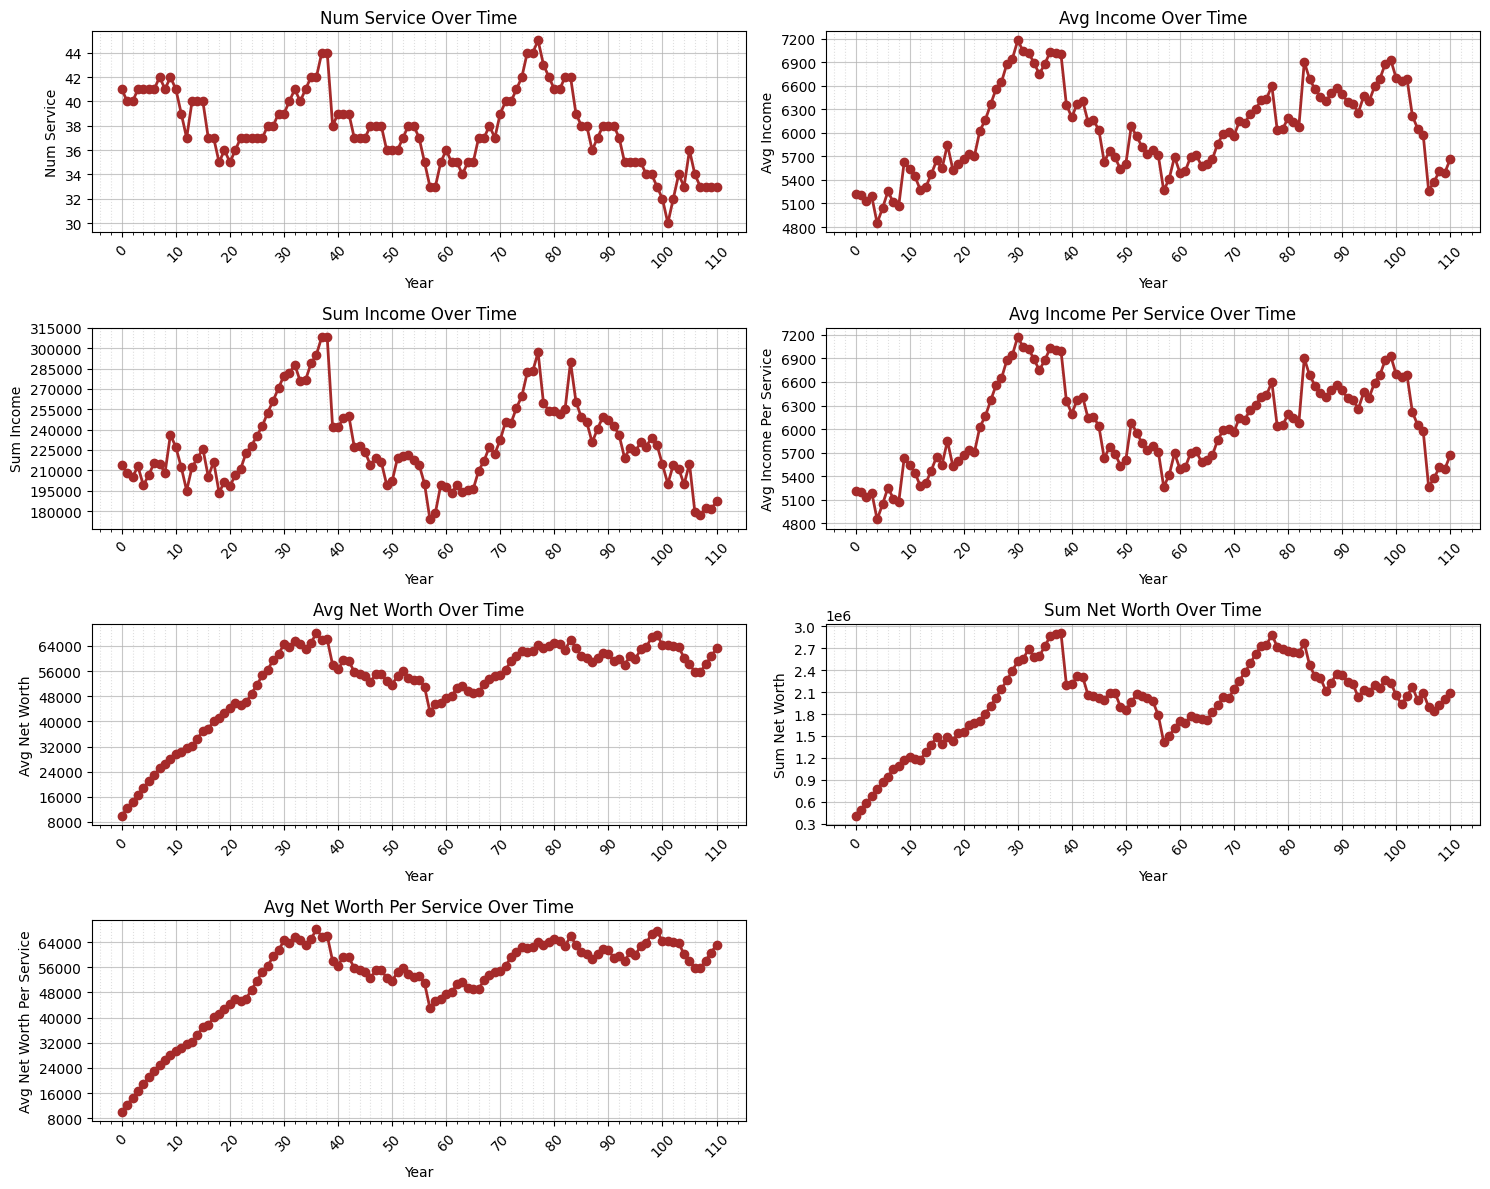

In [110]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in service_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(service_year_income['year'], service_year_income[var], marker='o', linewidth=2, color='brown')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

In [112]:
#rate of increase in service provider income
# Rate of increase in service provider income
service_year_income['income_growth'] = service_year_income['avg_income'].pct_change() * 100
service_year_income.tail(10)


year  num_service  avg_income  sum_income  avg_income_per_service  \
101   101           30     6666.00   199979.93                 6666.00   
102   102           32     6686.92   213981.59                 6686.92   
103   103           34     6213.42   211256.45                 6213.42   
104   104           33     6049.00   199616.88                 6049.00   
105   105           36     5972.24   215000.80                 5972.24   
106   106           34     5263.92   178973.29                 5263.92   
107   107           33     5375.82   177402.05                 5375.82   
108   108           33     5513.81   181955.80                 5513.81   
109   109           33     5493.08   181271.52                 5493.08   
110   110           33     5667.37   187023.07                 5667.37   

     avg_net_worth  sum_net_worth  avg_net_worth_per_service  income_growth  
101       64382.27     1931468.10                   64382.27      -0.452191  
102       64016.98     2048543.32                   64016.98       0.313831  
103       63696.03     2165665.05                   63696.03      -7.080988  
104       60180.57     1985958.67                   60180.57      -2.646208  
105       58136.92     2092929.04                   58136.92      -1.268970  
106       55730.97     1894852.98                   55730.97     -11.860207  
107       55686.02     1837638.51                   55686.02       2.125792  
108       58144.27     1918760.97                   58144.27       2.566864  
109       60627.41     2000704.52                   60627.41      -0.375965  
110       63195.59     2085454.55                   63195.59       3.172901

In [113]:
#average income growth of the last 3 years

service_year_income['avg_income_growth_3_years'] = service_year_income['income_growth'].rolling(window=3).mean()
service_year_income.tail(10)


year  num_service  avg_income  sum_income  avg_income_per_service  \
101   101           30     6666.00   199979.93                 6666.00   
102   102           32     6686.92   213981.59                 6686.92   
103   103           34     6213.42   211256.45                 6213.42   
104   104           33     6049.00   199616.88                 6049.00   
105   105           36     5972.24   215000.80                 5972.24   
106   106           34     5263.92   178973.29                 5263.92   
107   107           33     5375.82   177402.05                 5375.82   
108   108           33     5513.81   181955.80                 5513.81   
109   109           33     5493.08   181271.52                 5493.08   
110   110           33     5667.37   187023.07                 5667.37   

     avg_net_worth  sum_net_worth  avg_net_worth_per_service  income_growth  \
101       64382.27     1931468.10                   64382.27      -0.452191   
102       64016.98     2048543.32                   64016.98       0.313831   
103       63696.03     2165665.05                   63696.03      -7.080988   
104       60180.57     1985958.67                   60180.57      -2.646208   
105       58136.92     2092929.04                   58136.92      -1.268970   
106       55730.97     1894852.98                   55730.97     -11.860207   
107       55686.02     1837638.51                   55686.02       2.125792   
108       58144.27     1918760.97                   58144.27       2.566864   
109       60627.41     2000704.52                   60627.41      -0.375965   
110       63195.59     2085454.55                   63195.59       3.172901   

     avg_income_growth_3_years  
101                  -1.045049  
102                  -1.155528  
103                  -2.406449  
104                  -3.137788  
105                  -3.665389  
106                  -5.258461  
107                  -3.667795  
108                  -2.389183  
109                   1.438897  
110                   1.787933